# Large-Cap Blend Fund Prediction Modelling: Linear Regression

This section uses a Linear Regression model to predict the probable direction of prices for the top 4 Large-Cap Blend (Blend between Large Growth & Large Value funds) ETFs by fund size (in billions - USD). As mentioned on Part 1, those index funds are:<br />

IVV - iShares Core S&P 500 ETF<br />
VOO - Vanguard Standard and Poor 500 ETF<br />
SPY - SPDR Standard and Poor 500 ETF Trust<br />
VTI - Vanguard Total Stock Market ETF<br />

<br />
The notebook's sections about the Prediction / Machine Learning Model are:<br />
1. Set up libraries, download historical data & visualize data<br />
2. Creating & training the linear regression model<br />
3. Model evaluation<br />
4. Graphing linear regression models (with training data)<br />
5. Prediction from our model<br />
6. Regression evaluation<br />
7. Linear regression scatterplots (price vs time) with test data<br />
8. Graphing 'predicted price vs actual price' scatterplots<br />
9. Plot residual histograms<br />
10. Perform error evaluation metrics<br />
11. Perform accuracy evaluation metrics<br />
12. Results - IMPORTANT<br />
13. Conclusion - IMPORTANT<br />

<br />
Morningstar fund definitions:<br /> 
1. Large Growth Funds are defined as those that invest in large-sized companies projected to grow fast. These tend to have high volatility, and high valuations (high price ratios & low dividend yields). These are known for being ‘high risk but high reward’.<br />
2. Large Value Funds are defined as those that invest in large-sized companies that have slow growth and low valuations (low price ratios and high dividend yields).<br />
3. Large Blend Funds are defined as those that invest in a combination of large Value & large Growth. These funds represent the overall U.S. Stock market and invest in across the spectrum of U.S. industries.<br />

# What is linear regression?

Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. The regression model predicts the value of the dependent variable, which is the response or outcome variable being analyzed or studied & simulates a mathematical relationship between variables and makes predictions for continuous or numeric variables such as sales, salary, age, product price, etc. In this case, our prediction is based on the following question - Will prices continue to increase for the top 4 large blend funds on the long run?

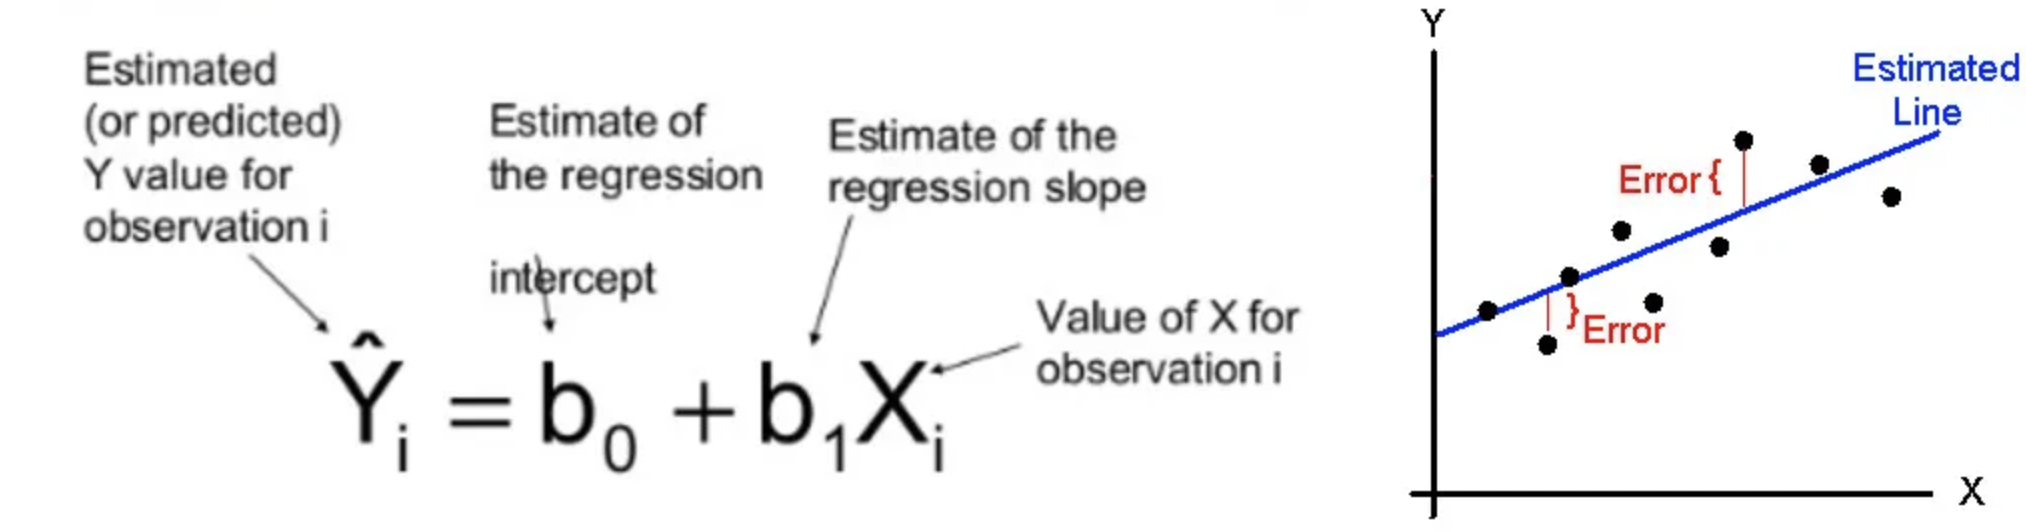

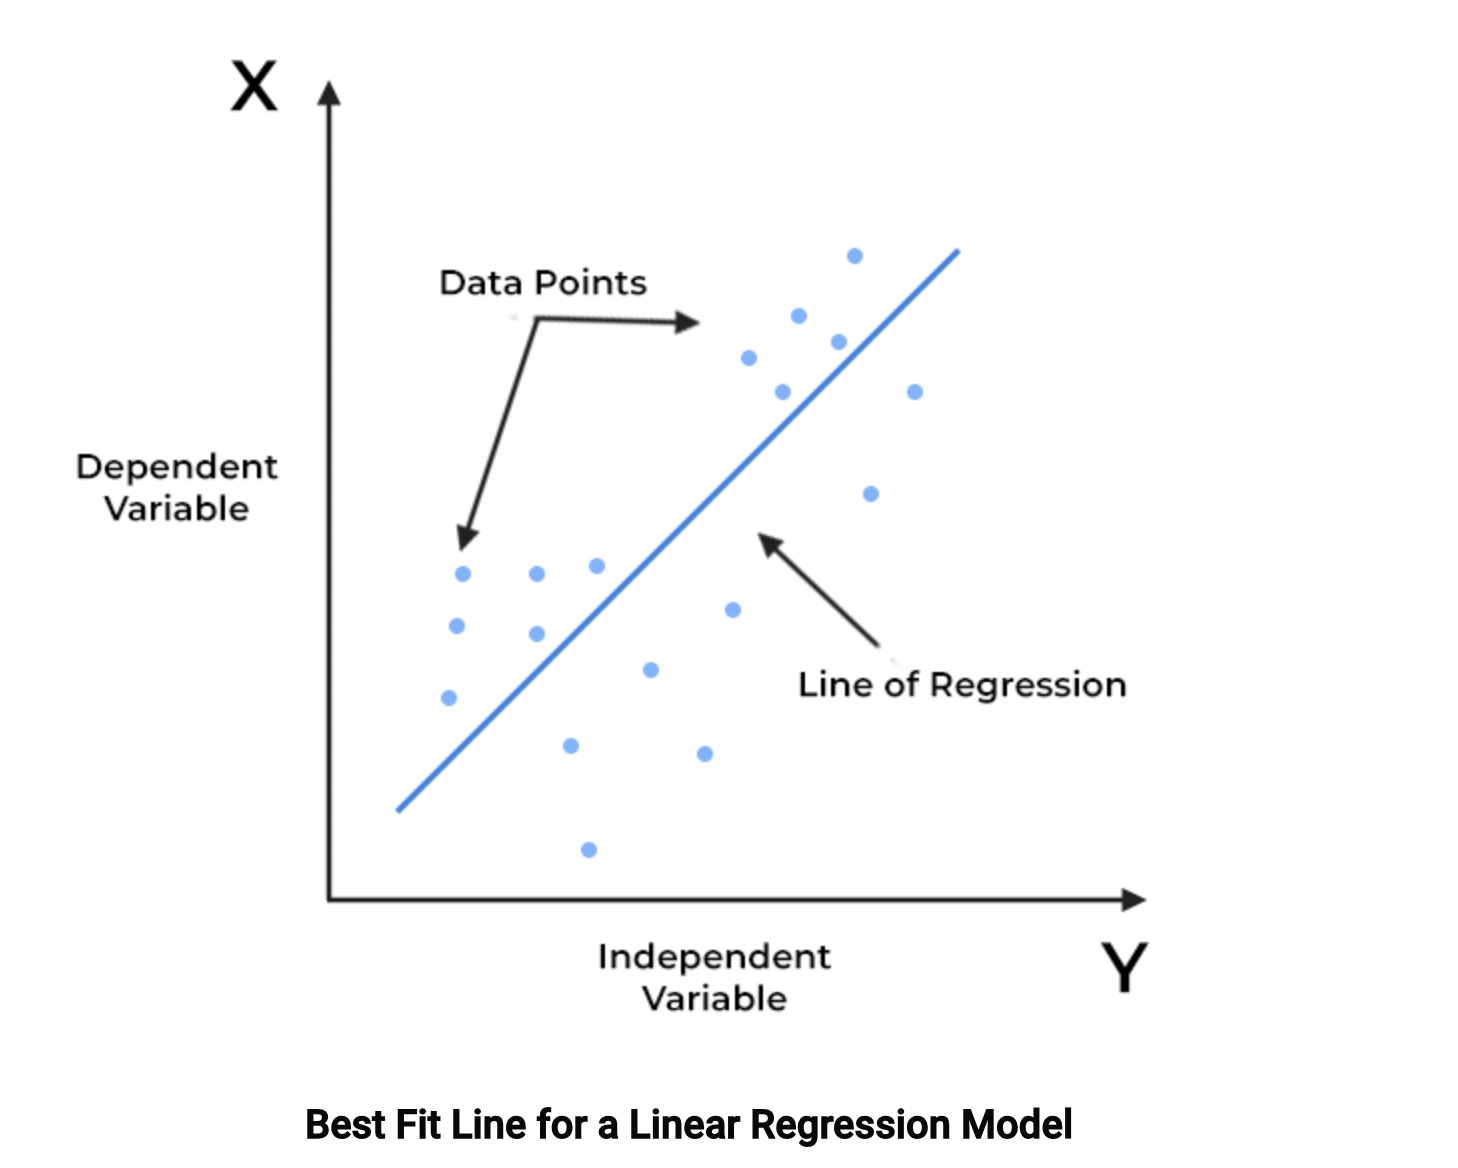

# Step 1 - Set up libraries, download historical data & visualize data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import yfinance as yf

# Machine Learning Libraries
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import explained_variance_score

In [3]:
# Get data; starting dates are the funds' inception dates
ivv = yf.download("IVV", '2000-05-15', '2023-12-30')
voo = yf.download("VOO", '2010-09-07', '2023-12-30')
spy = yf.download("SPY", '1993-01-22', '2023-12-30')
vti = yf.download("VTI", '2001-05-24', '2023-12-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Verify that dataframes look accurate
ivv
#voo
#spy
#vti

Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-05-19  142.656250  142.656250  140.250000  140.687500   91.177505   
2000-05-22  140.593750  140.593750  136.812500  139.812500   90.610443   
2000-05-23  140.218750  140.218750  137.687500  137.687500   89.233246   
2000-05-24  137.750000  140.062500  136.656250  139.750000   90.569901   
2000-05-25  140.031250  140.937500  137.875000  138.468750   89.739532   
...                ...         ...         ...         ...         ...   
2023-12-22  476.130005  477.630005  473.940002  475.820007  475.820007   
2023-12-26  476.320007  478.809998  476.230011  477.869995  477.869995   
2023-12-27  477.779999  478.899994  477.160004  478.779999  478.779999   
2023-12-28  479.149994  479.790009  478.519989  479.000000  479.000000   
2023-12-29  478.730011  479.260010  475.540009  477.630005  477.630005   

             Volume  
Date                 
2000-05-19   775500  
2000-05-22  1850600  
2000-05-23   373900  
2000-05-24   400300  
2000-05-25    69600  
...             ...  
2023-12-22  4266900  
2023-12-26  2235700  
2023-12-27  3761000  
2023-12-28  3429500  
2023-12-29  3989700  

[5941 rows x 6 columns]

In [5]:
# Check data types in columns
ivv.info()
#voo.info()
#spy.info()
#vti.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5941 entries, 2000-05-19 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5941 non-null   float64
 1   High       5941 non-null   float64
 2   Low        5941 non-null   float64
 3   Close      5941 non-null   float64
 4   Adj Close  5941 non-null   float64
 5   Volume     5941 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 324.9 KB


### Check descriptive statistics

In [6]:
# Get descriptive statistics summary of IVV data set 
ivv.describe()

Open         High          Low        Close    Adj Close  \
count  5941.000000  5941.000000  5941.000000  5941.000000  5941.000000   
mean    199.004192   200.121917   197.767951   199.020253   171.001141   
std     106.960403   107.511136   106.376940   106.988910   114.436753   
min      68.160004    70.129997    67.220001    68.190002    51.267899   
25%     119.250000   119.889999   118.540001   119.190002    85.208214   
50%     146.699997   147.515625   145.800003   146.740005   110.627342   
75%     263.230011   265.769989   260.869995   263.670013   238.973740   
max     481.369995   482.070007   478.519989   479.839996   479.000000   

             Volume  
count  5.941000e+03  
mean   3.255340e+06  
std    2.756532e+06  
min    6.500000e+03  
25%    1.070300e+06  
50%    2.973800e+06  
75%    4.447600e+06  
max    3.874850e+07

In [7]:
# Get descriptive statistics summary of VOO data set 
voo.describe()

Open         High          Low        Close    Adj Close  \
count  3350.000000  3350.000000  3350.000000  3350.000000  3350.000000   
mean    239.197439   240.444606   237.824212   239.231137   218.570021   
std      96.059177    96.664223    95.420203    96.079731   102.011293   
min      99.139999   101.860001    98.239998   100.339996    78.743355   
25%     166.047501   166.509995   165.590004   166.279995   138.352108   
50%     219.080002   219.625000   218.264999   219.004997   194.580544   
75%     309.217491   310.687500   307.109993   309.237495   291.838028   
max     440.579987   441.260010   437.660004   439.250000   437.970001   

             Volume  
count  3.350000e+03  
mean   2.567053e+06  
std    2.360912e+06  
min    8.600000e+03  
25%    9.537875e+05  
50%    2.083250e+06  
75%    3.464750e+06  
max    2.466930e+07

In [8]:
# Get descriptive statistics summary of SPY data set 
spy.describe()

Open         High          Low        Close    Adj Close  \
count  7786.000000  7786.000000  7786.000000  7786.000000  7786.000000   
mean    170.450003   171.472339   169.326798   170.458874   142.060268   
std     106.640696   107.212931   106.034684   106.668401   112.437530   
min      43.343750    43.531250    42.812500    43.406250    24.540340   
25%     105.280622   106.247498   104.450624   105.285000    70.617348   
50%     132.178749   132.987190   131.160004   132.061249    93.469715   
75%     210.257496   211.015003   209.307499   210.340000   181.201008   
max     479.220001   479.980011   476.260010   477.709991   476.690002   

             Volume  
count  7.786000e+03  
mean   8.447759e+07  
std    9.233423e+07  
min    5.200000e+03  
25%    1.002330e+07  
50%    6.315320e+07  
75%    1.159852e+08  
max    8.710263e+08

In [9]:
# Get descriptive statistics summary of VTI data set 
vti.describe()

Open         High          Low        Close    Adj Close  \
count  5671.000000  5671.000000  5671.000000  5671.000000  5671.000000   
mean    101.743846   102.293630   101.075984   101.729078    88.537589   
std      55.517147    55.808645    55.186671    55.523593    58.750706   
min      33.669998    34.700001    29.760000    33.700001    24.636644   
25%      58.299999    58.657499    57.890001    58.297499    42.874907   
50%      75.165001    75.430000    74.805000    75.139999    58.942341   
75%     137.604996   138.209999   136.604996   137.455002   124.836945   
max     243.729996   244.059998   242.429993   242.970001   238.250000   

             Volume  
count  5.671000e+03  
mean   2.289288e+06  
std    2.427473e+06  
min    1.160000e+04  
25%    6.215000e+05  
50%    1.886000e+06  
75%    3.020750e+06  
max    4.231620e+07

In [10]:
# Create a new DataFrame with only closing price and date
ivv_df = pd.DataFrame(ivv, columns=['Close'])
voo_df = pd.DataFrame(voo, columns=['Close'])
spy_df = pd.DataFrame(spy, columns=['Close'])
vti_df = pd.DataFrame(vti, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
ivv_df = ivv_df.reset_index()
voo_df = voo_df.reset_index()
spy_df = spy_df.reset_index()
vti_df = vti_df.reset_index()

In [11]:
# Check for missing values in the columns
ivv_df.isna().values.any()
#voo_df.isna().values.any()
#spy_df.isna().values.any()
#vti_df.isna().values.any()

False

In [14]:
# Format dates & create plot for IVV
years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

### Data visualization

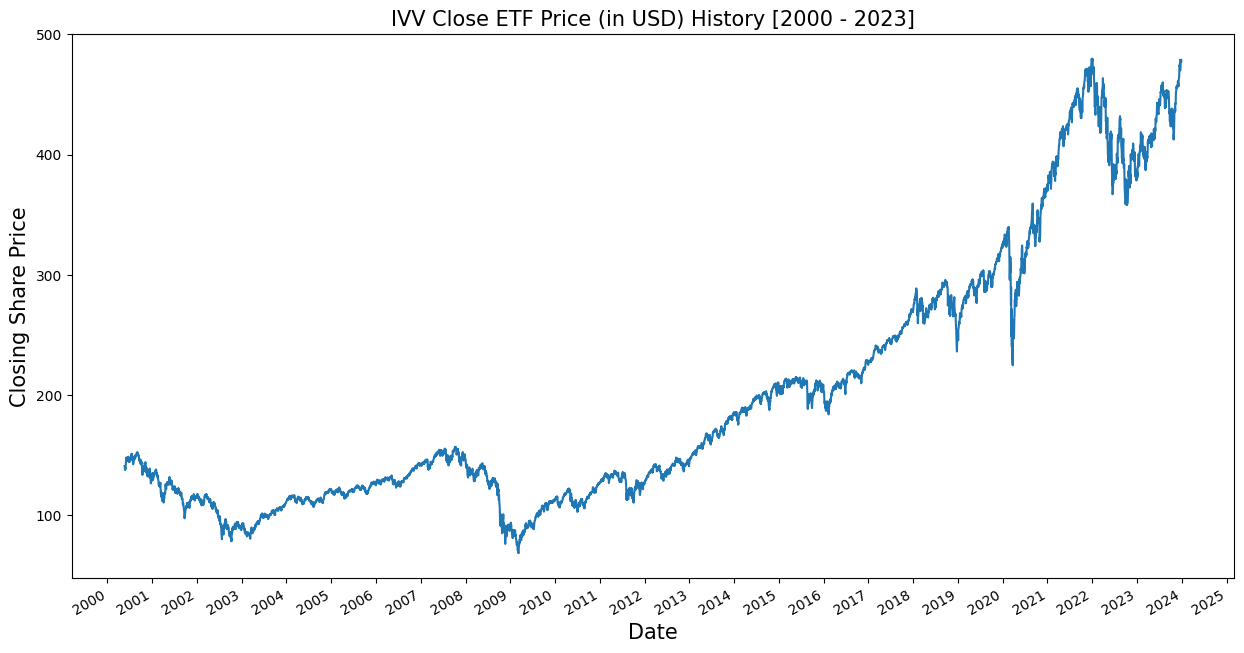

In [17]:
# IVV Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18, 8]
ax.plot(ivv_df['Date'], ivv_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('IVV Close ETF Price (in USD) History [2000 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

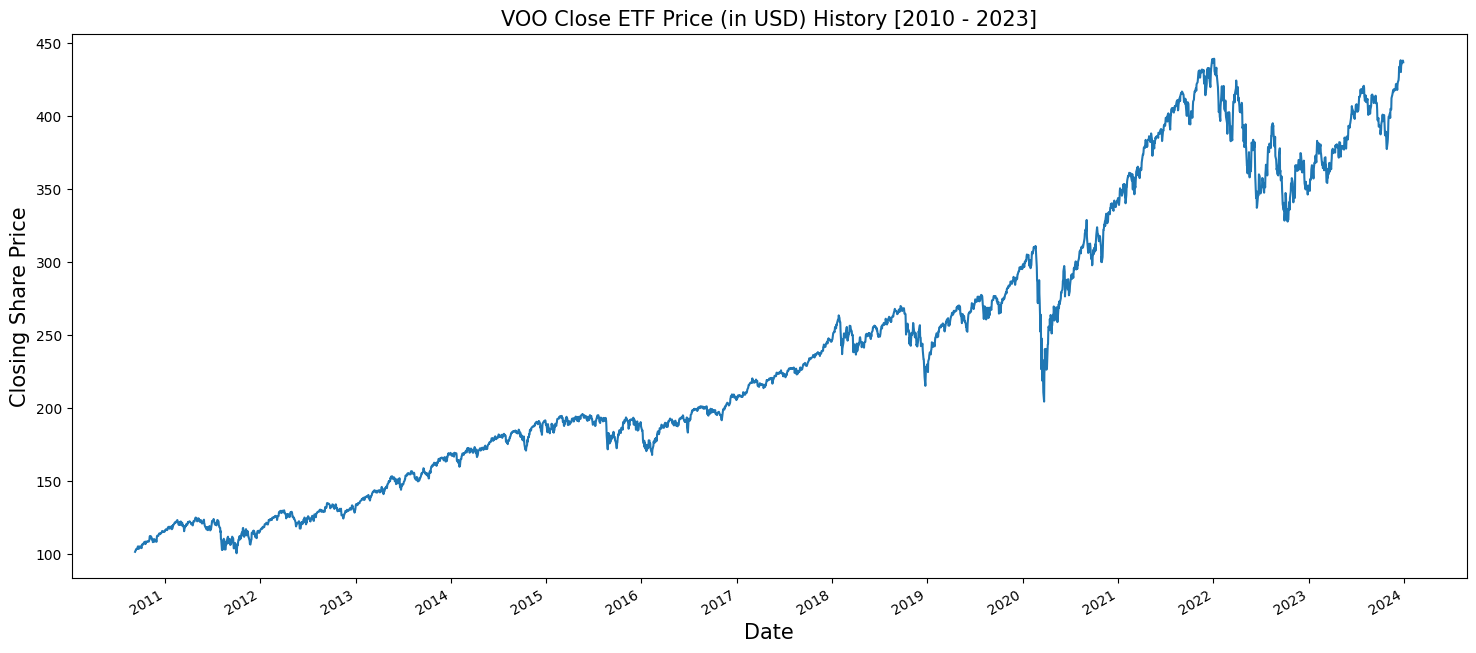

In [18]:
# VOO Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
#plt.rcParams['figure.figsize'] = [15, 7]
ax.plot(voo_df['Date'], voo_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('VOO Close ETF Price (in USD) History [2010 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

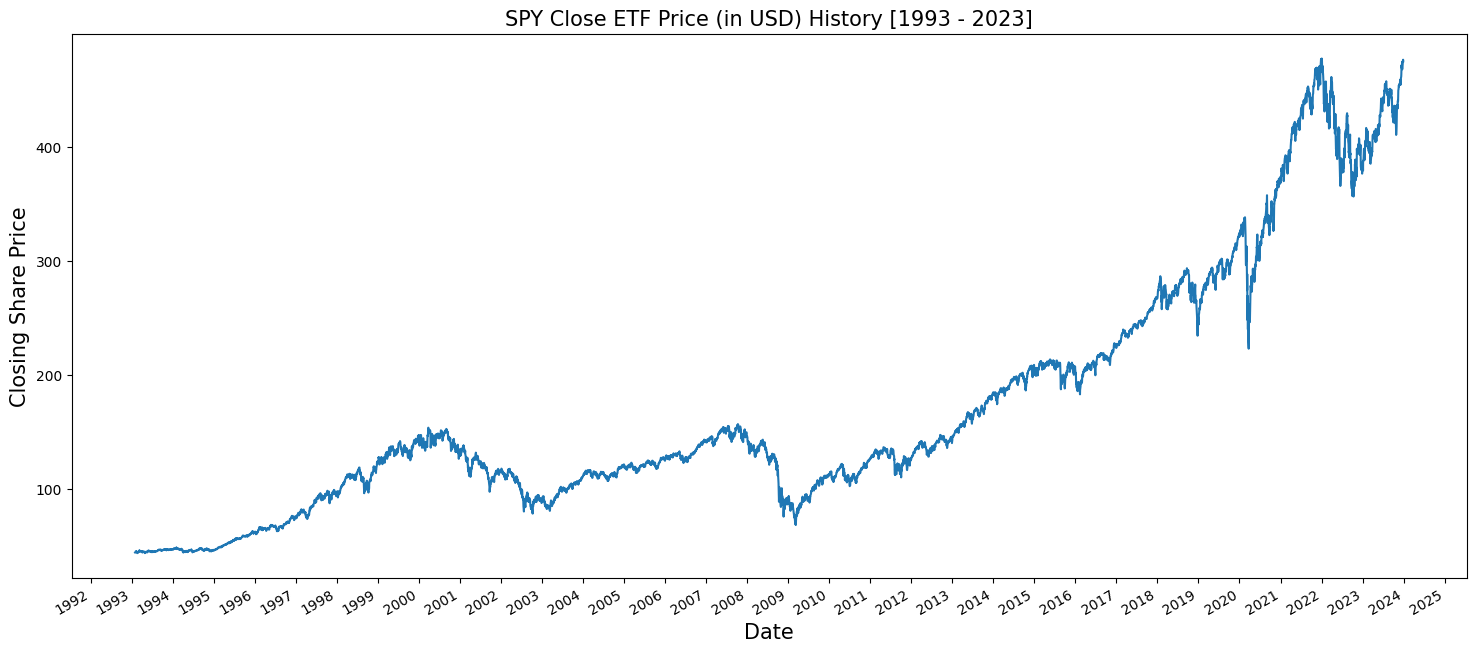

In [19]:
# SPY Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
#plt.rcParams['figure.figsize'] = [15, 9]
ax.plot(spy_df['Date'], spy_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('SPY Close ETF Price (in USD) History [1993 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

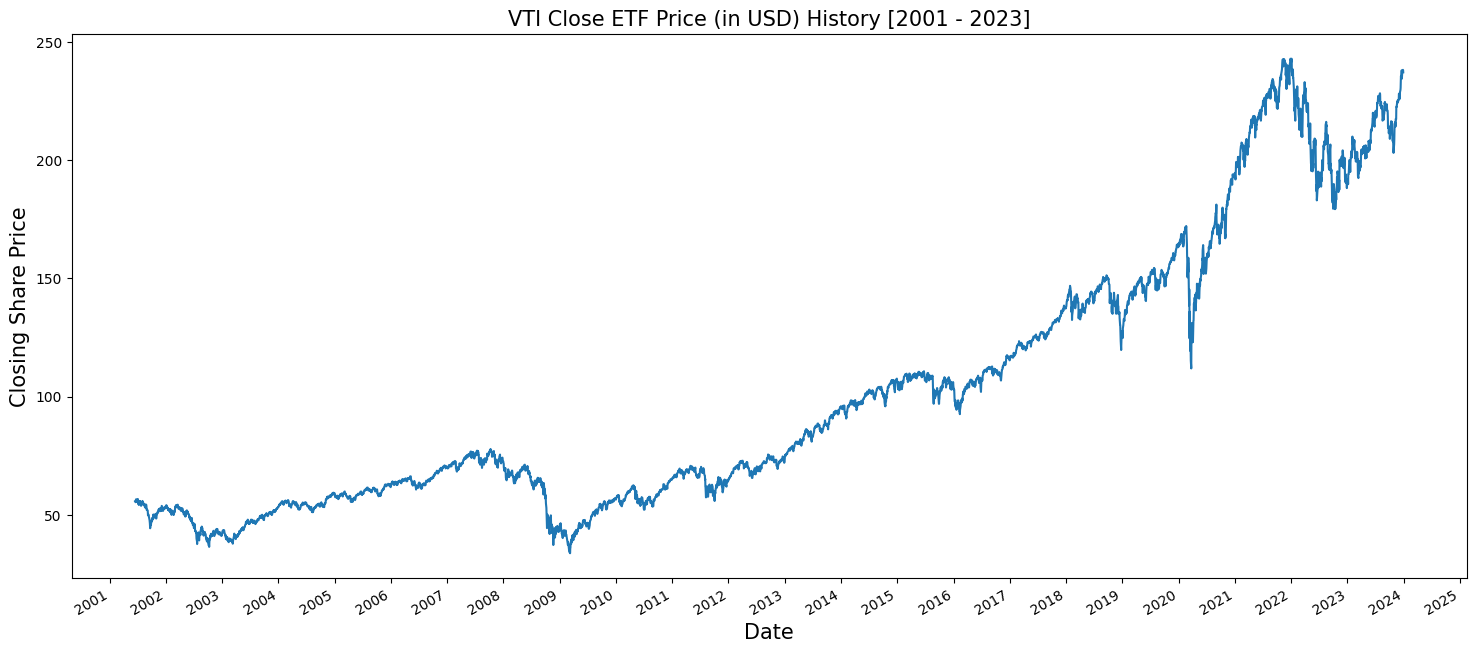

In [20]:
# VTI Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
#plt.rcParams['figure.figsize'] = [15, 9]
ax.plot(vti_df['Date'], vti_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('VTI Close ETF Price (in USD) History [2001 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

# Step 2 - Creating & training the linear regression model

In [21]:
# Train test Split
# Split data into train and test set: 80% / 20%
train_ivv, test_ivv = train_test_split(ivv_df, test_size=0.20)
train_voo, test_voo = train_test_split(voo_df, test_size=0.20)
train_spy, test_spy = train_test_split(spy_df, test_size=0.20)
train_vti, test_vti = train_test_split(vti_df, test_size=0.20)

In [22]:
# Reshape index column to 2D array for .fit() method
X_train_ivv = np.array(train_ivv.index).reshape(-1, 1)
X_train_voo = np.array(train_voo.index).reshape(-1, 1)
X_train_spy = np.array(train_spy.index).reshape(-1, 1)
X_train_vti = np.array(train_vti.index).reshape(-1, 1)

# Train Close column
y_train_ivv = train_ivv['Close']
y_train_voo = train_voo['Close']
y_train_spy = train_spy['Close']
y_train_vti = train_vti['Close']

In [23]:
# Create LinearRegression Object
ivv_model = LinearRegression()
voo_model = LinearRegression()
spy_model = LinearRegression()
vti_model = LinearRegression()

In [24]:
# Fit linear model using the train data set for ivv
ivv_model.fit(X_train_ivv, y_train_ivv)

LinearRegression()

In [25]:
# Fit linear model using the train data set for voo
voo_model.fit(X_train_voo, y_train_voo)

LinearRegression()

In [26]:
# Fit linear model using the train data set for spy
spy_model.fit(X_train_spy, y_train_spy)

LinearRegression()

In [27]:
# Fit linear model using the train data set for vti
vti_model.fit(X_train_vti, y_train_vti)

LinearRegression()

# Step 3 - Model Evaluation

Interpreting the coefficients:<br />

1. The __slope__ coefficient tells us that with a 1 unit increase in date the closing price increases by x decimal result<br />
2. The __intercept__ coefficient is the price at wich the closing price measurement started, the ETF price value at date zero

In [28]:
# The coefficient
print('IVV Model Slope: ', np.asscalar(np.squeeze(ivv_model.coef_)))
# The Intercept
print('IVV Model Intercept: ', ivv_model.intercept_)

IVV Model Slope:  0.05476380565454956
IVV Model Intercept:  36.292314566513284


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_5715/1885336461.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('IVV Model Slope: ', np.asscalar(np.squeeze(ivv_model.coef_)))


In [29]:
# The coefficient
print('VOO Model Slope: ', np.asscalar(np.squeeze(voo_model.coef_)))
# The Intercept
print('VOO Model Intercept: ', voo_model.intercept_)

VOO Model Slope:  0.09544473966580905
VOO Model Intercept:  79.32668686159292


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_5715/4143926836.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('VOO Model Slope: ', np.asscalar(np.squeeze(voo_model.coef_)))


In [30]:
# The coefficient
print('SPY Model Slope: ', np.asscalar(np.squeeze(spy_model.coef_)))
# The Intercept
print('SPY Model Intercept: ', spy_model.intercept_)

SPY Model Slope:  0.040945882049475836
SPY Model Intercept:  11.217321012722294


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_5715/3511563212.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('SPY Model Slope: ', np.asscalar(np.squeeze(spy_model.coef_)))


In [31]:
# The coefficient
print('VTI Model Slope: ', np.asscalar(np.squeeze(vti_model.coef_)))
# The Intercept
print('VTI Model Intercept: ', vti_model.intercept_)

VTI Model Slope:  0.030849735770088302
VTI Model Intercept:  14.39032892141715


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_5715/2374838658.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('VTI Model Slope: ', np.asscalar(np.squeeze(vti_model.coef_)))


# Step 4 - Graphing linear regression models (with training data)

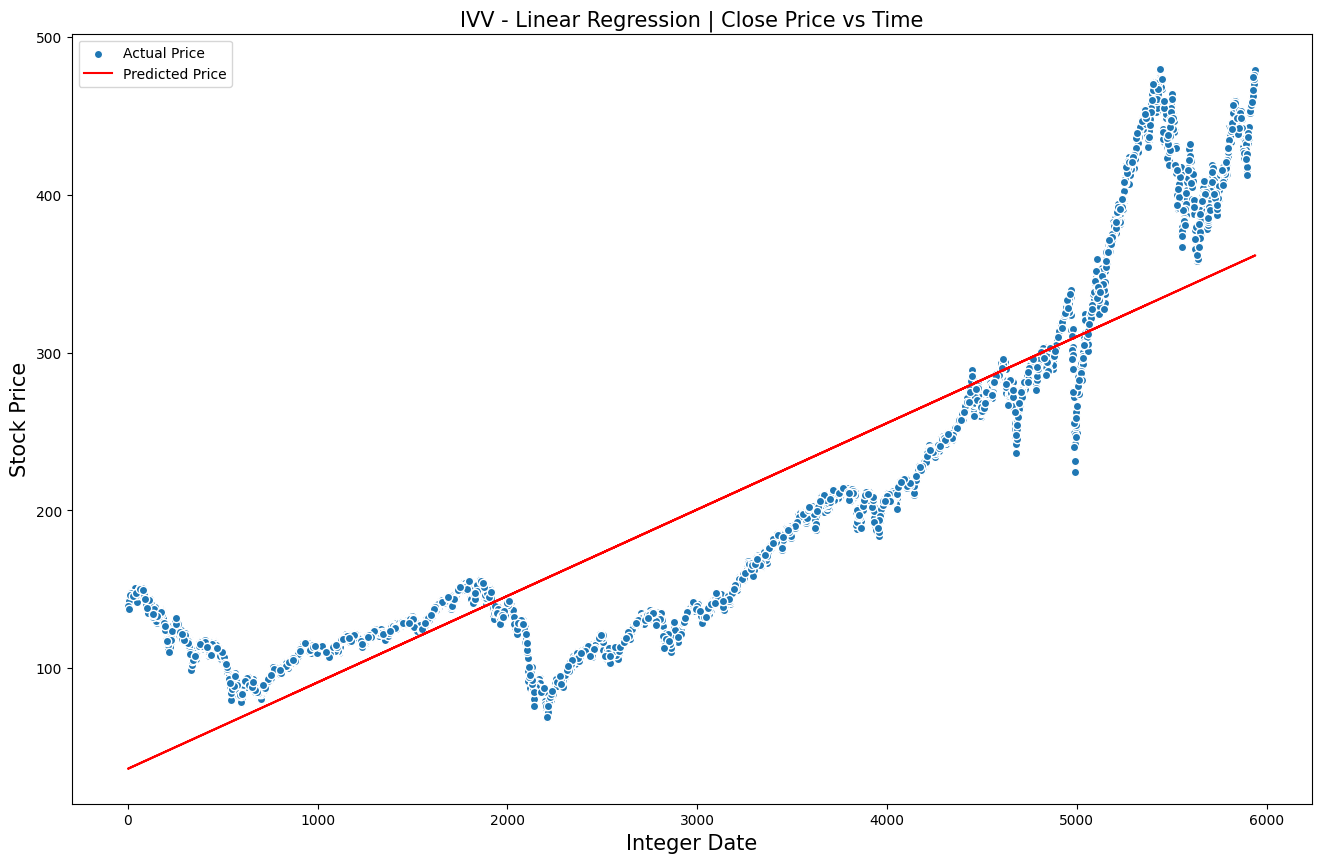

In [32]:
# Train set graph for IVV
plt.figure(1, figsize=(16,10))
plt.title('IVV - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_ivv, y_train_ivv, edgecolor='w', label='Actual Price')
plt.plot(X_train_ivv, ivv_model.predict(X_train_ivv), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

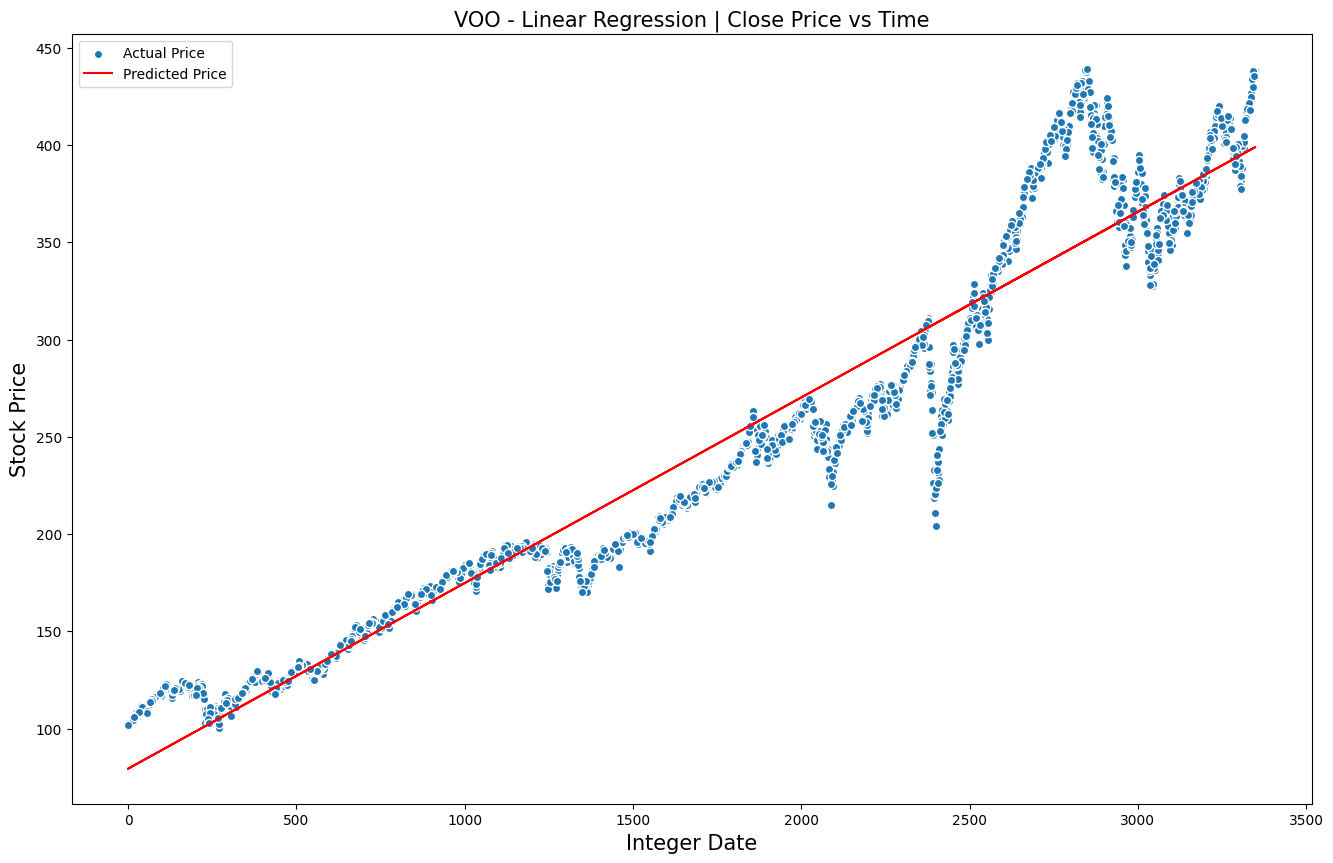

In [33]:
# Train set graph for VOO
plt.figure(1, figsize=(16,10))
plt.title('VOO - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_voo, y_train_voo, edgecolor='w', label='Actual Price')
plt.plot(X_train_voo, voo_model.predict(X_train_voo), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

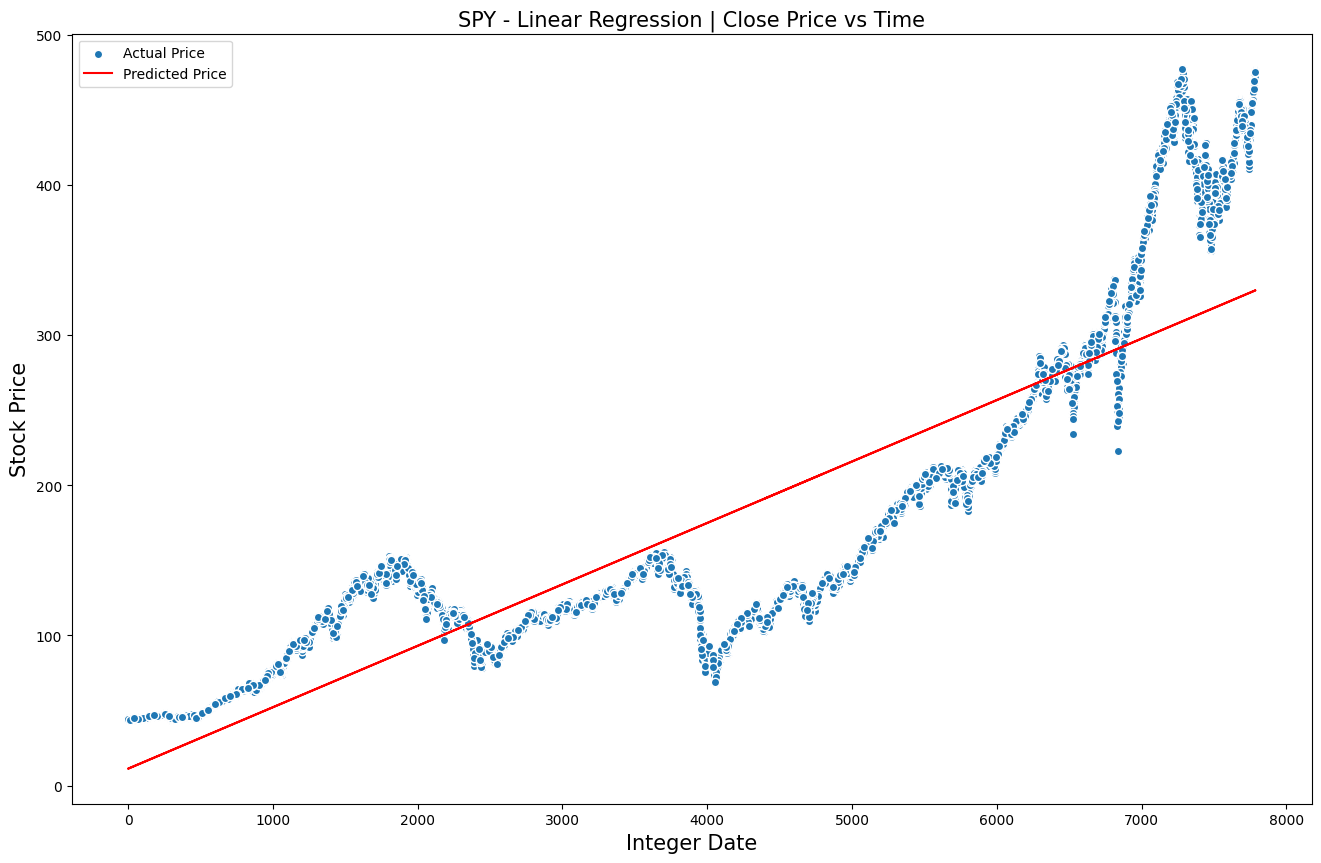

In [34]:
# Train set graph for SPY
plt.figure(1, figsize=(16,10))
plt.title('SPY - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_spy, y_train_spy, edgecolor='w', label='Actual Price')
plt.plot(X_train_spy, spy_model.predict(X_train_spy), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

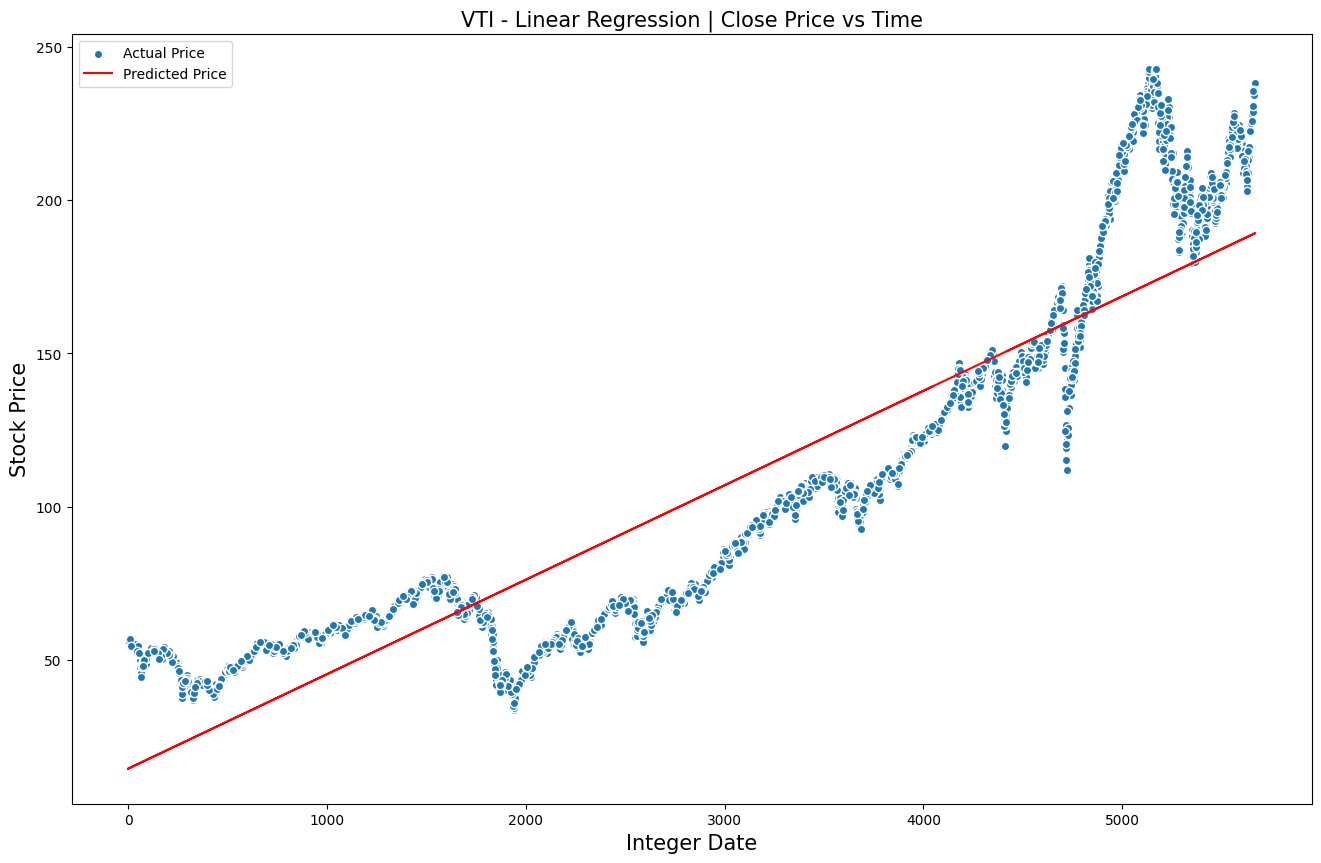

In [35]:
# Train set graph for VTI
plt.figure(1, figsize=(16,10))
plt.title('VTI - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_vti, y_train_vti, edgecolor='w', label='Actual Price')
plt.plot(X_train_vti, vti_model.predict(X_train_vti), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

# Step 5 - Prediction from our model

In [36]:
# Create test arrays for IVV
X_test_ivv = np.array(test_ivv.index).reshape(-1, 1)
y_test_ivv = test_ivv['Close']

In [37]:
# Generate array with predicted values
y_pred_ivv = ivv_model.predict(X_test_ivv)

In [38]:
# Create test arrays for VOO
X_test_voo = np.array(test_voo.index).reshape(-1, 1)
y_test_voo = test_voo['Close']

In [39]:
# Generate array with predicted values
y_pred_voo = voo_model.predict(X_test_voo)

In [40]:
# Create test arrays for SPY
X_test_spy = np.array(test_spy.index).reshape(-1, 1)
y_test_spy = test_spy['Close']

In [41]:
# Generate array with predicted values
y_pred_spy = spy_model.predict(X_test_spy)

In [42]:
# Create test arrays for VTI
X_test_vti = np.array(test_vti.index).reshape(-1, 1)
y_test_vti = test_vti['Close']

In [43]:
# Generate array with predicted values
y_pred_vti = vti_model.predict(X_test_vti)

# Step 6 - Regression evaluation

Let's have a look at how the predicted values compare with the actual value on random sample from our data set.

In [44]:
# Get number of rows in data set for random sample
ivv_df.shape

(5941, 2)

In [45]:
# Get number of rows in data set for random sample
voo_df.shape

(3350, 2)

In [46]:
# Get number of rows in data set for random sample
spy_df.shape

(7786, 2)

In [47]:
# Get number of rows in data set for random sample
vti_df.shape

(5671, 2)

In [48]:
# Generate 40 random numbers that will serve as 'bins' or segments
randints_ivv = np.random.randint(5941, size=40)
randints_voo = np.random.randint(3350, size=40)
randints_spy = np.random.randint(7786, size=40)
randints_vti = np.random.randint(5671, size=40)

# Select row numbers == random numbers
ivv_df_sample = ivv_df[ivv_df.index.isin(randints_ivv)]
voo_df_sample = voo_df[voo_df.index.isin(randints_voo)]
spy_df_sample = spy_df[spy_df.index.isin(randints_spy)]
vti_df_sample = vti_df[vti_df.index.isin(randints_vti)]

In [49]:
ivv_df_sample.head()
#voo_df_sample.head()
#spy_df_sample.head()
#vti_df_sample.head()

Date       Close
284  2001-07-06  118.860001
444  2002-03-01  113.760002
509  2002-06-04  104.680000
694  2003-02-27   84.349998
1056 2004-08-05  108.389999

### Comparison bar charts - predicted price vs. actual price in randomized samples

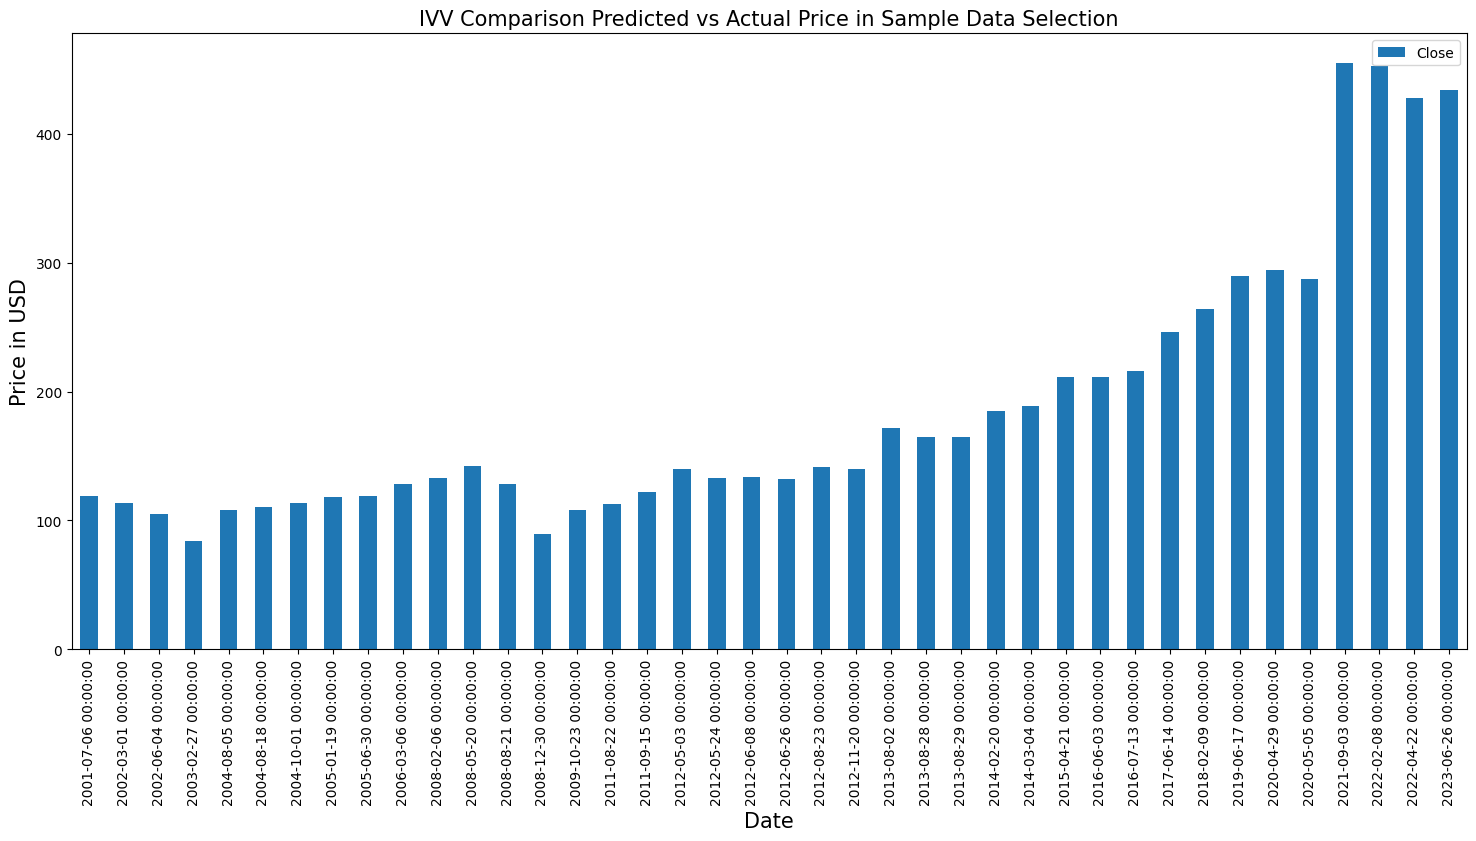

In [50]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ivv_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('IVV Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

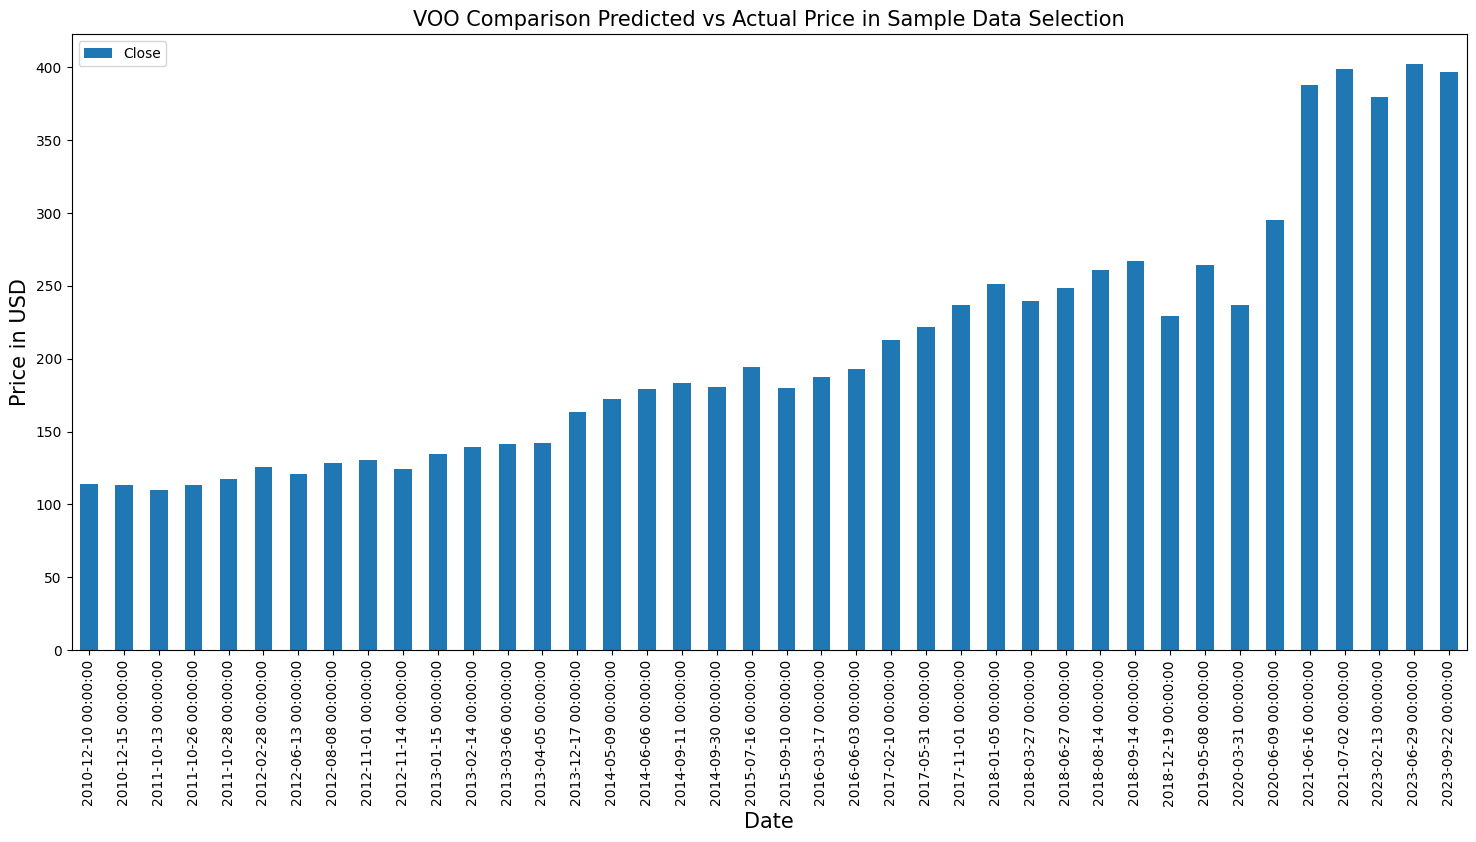

In [51]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
voo_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('VOO Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

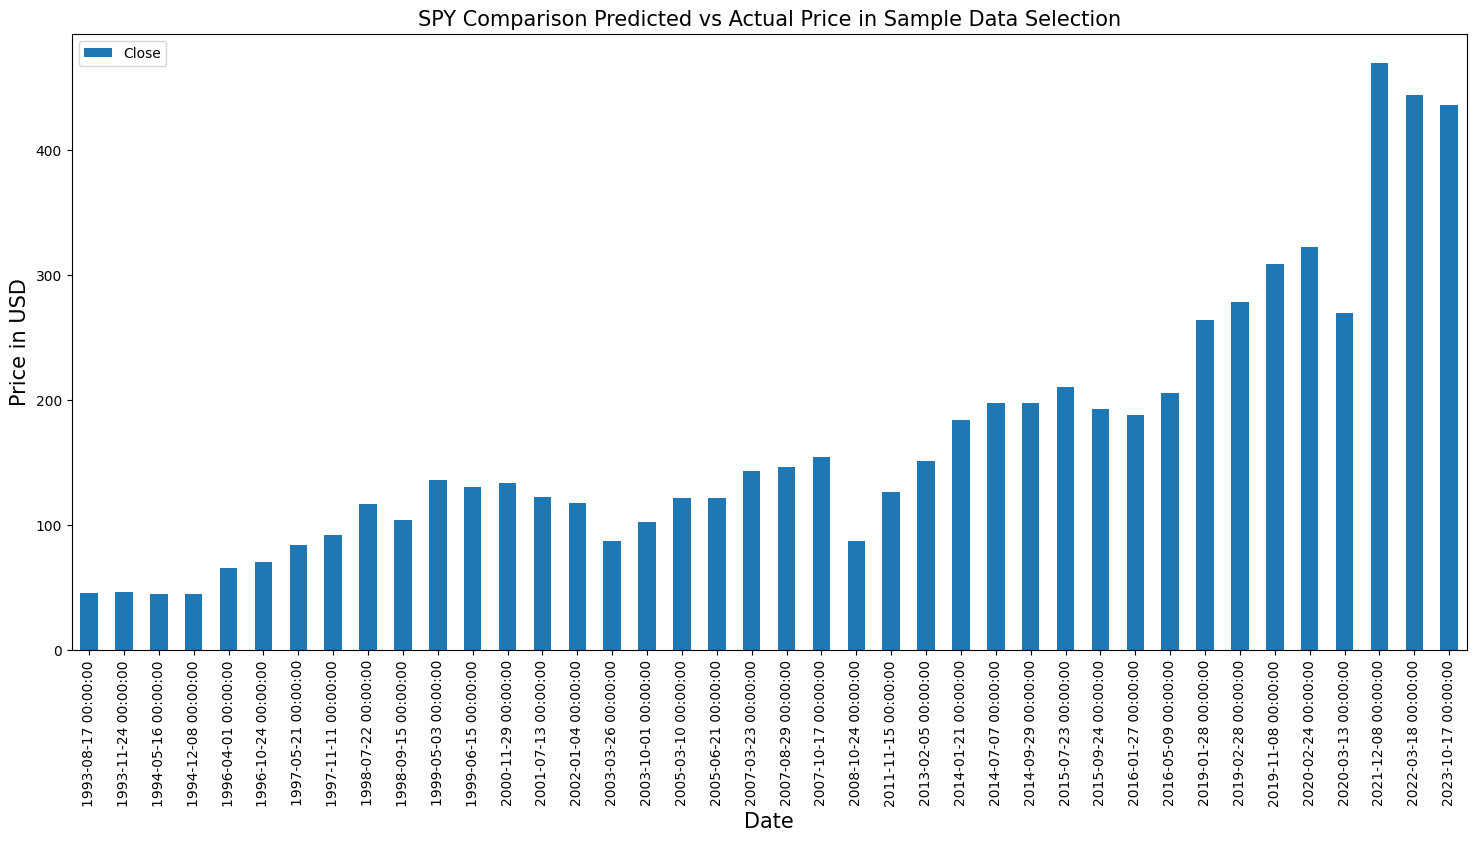

In [52]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
spy_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('SPY Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

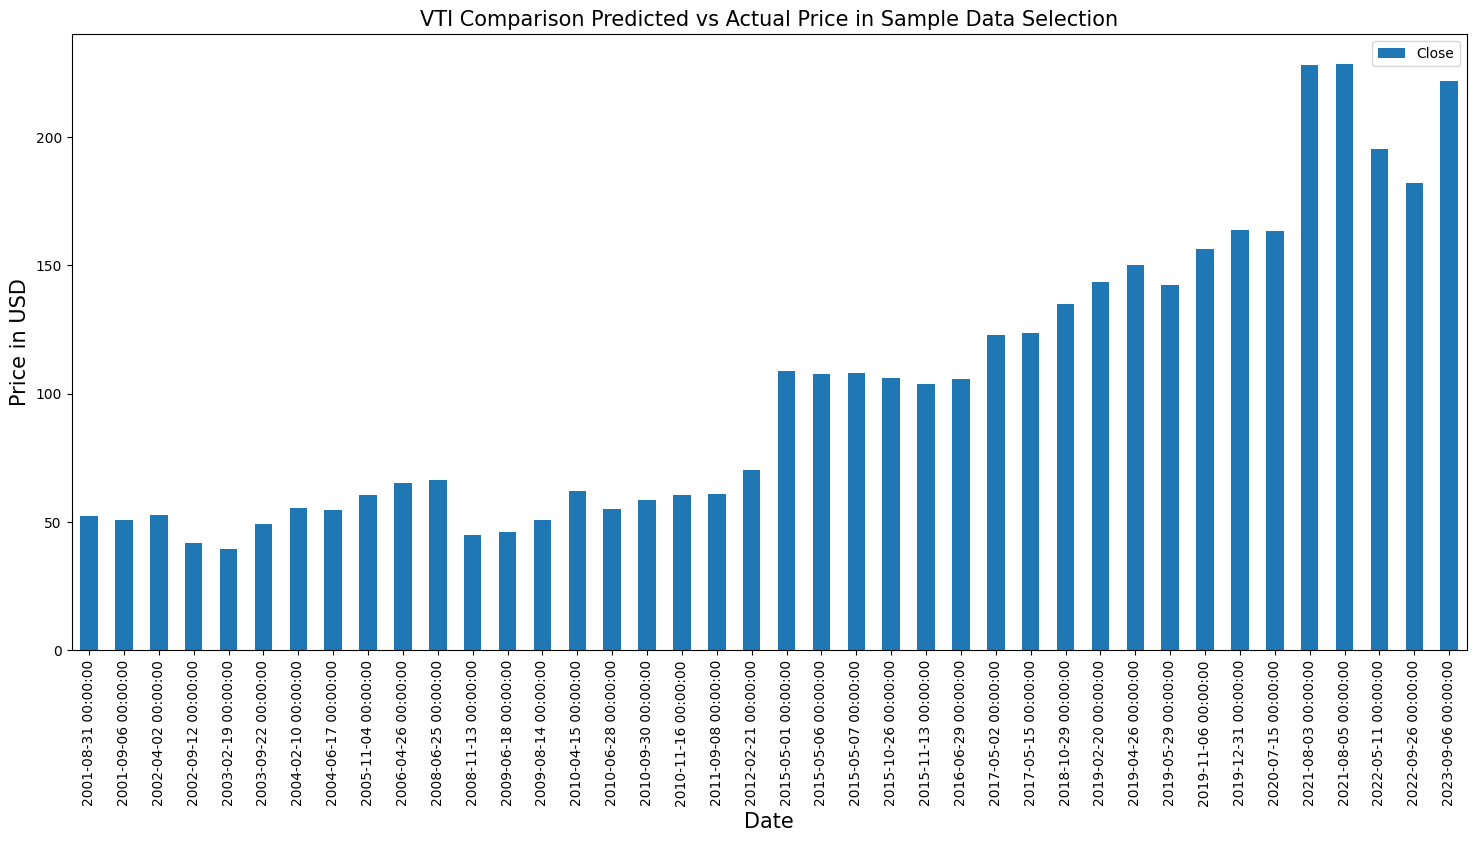

In [53]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
vti_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('VTI Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

We can see some larger variations between predicted and actual values in the random sample, but our models still point towards increasing prices with respect to time.

# Step 7 - Linear regression scatterplots (price vs time) with test data

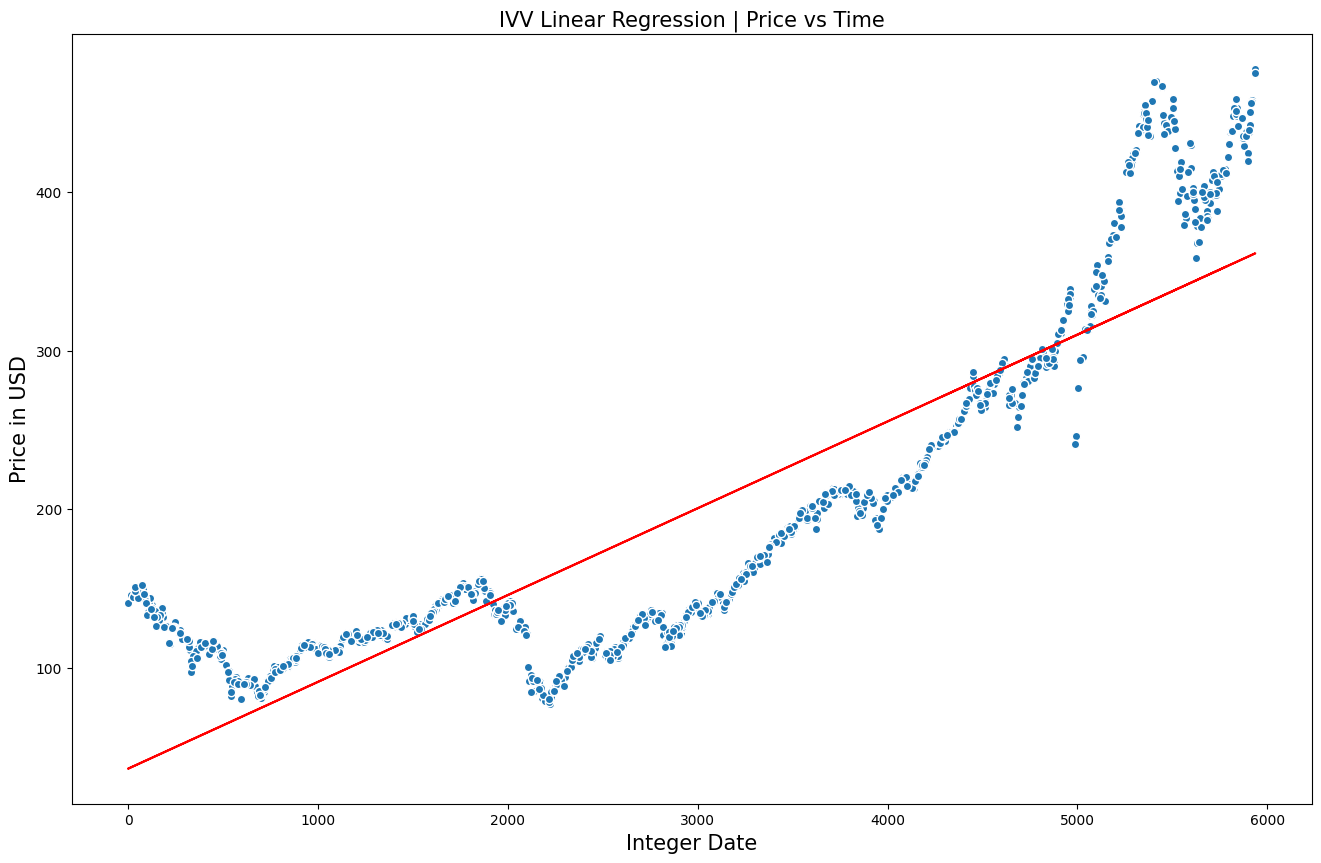

In [54]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('IVV Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_ivv, ivv_model.predict(X_test_ivv), color='r', label='Predicted Price')
plt.scatter(X_test_ivv, y_test_ivv, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

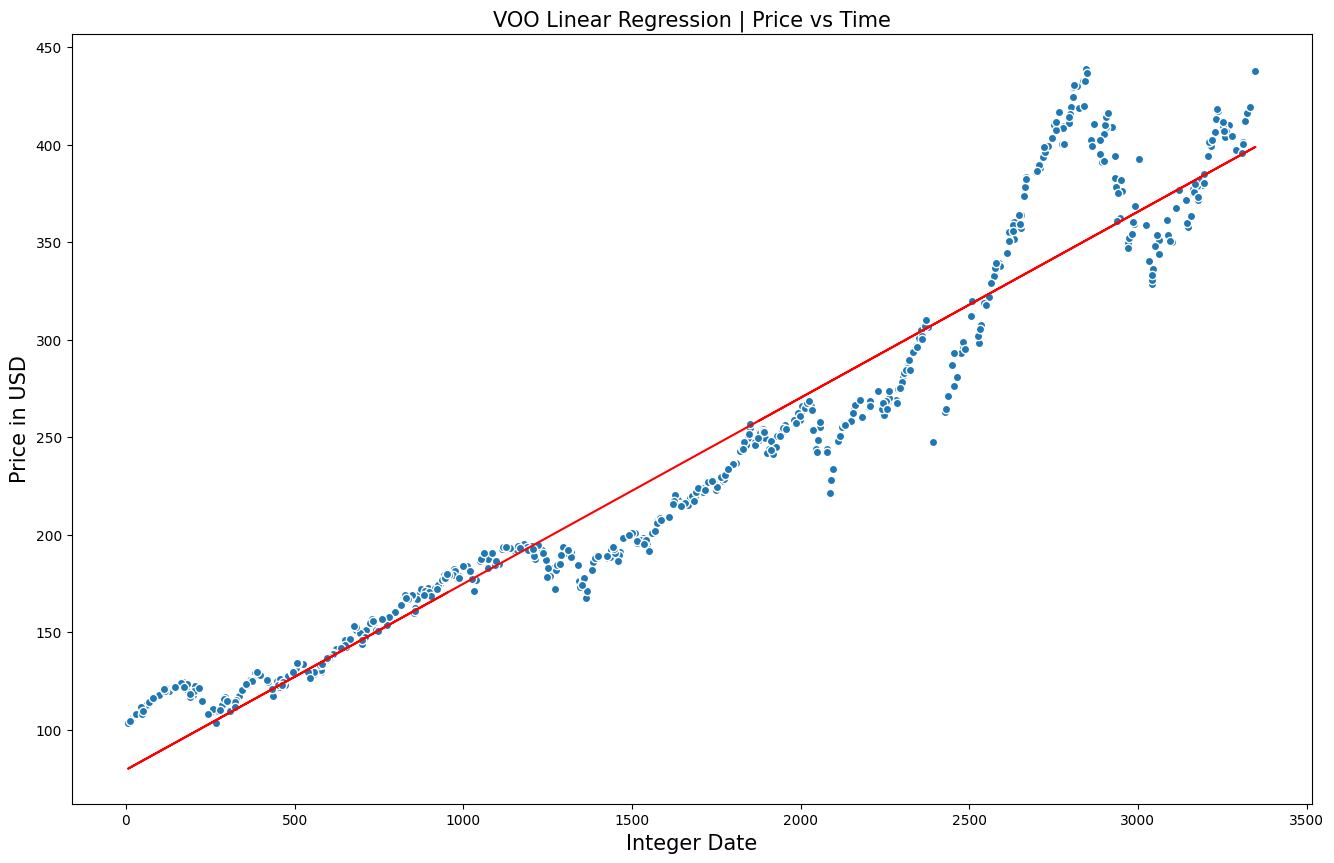

In [55]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('VOO Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_voo, voo_model.predict(X_test_voo), color='r', label='Predicted Price')
plt.scatter(X_test_voo, y_test_voo, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

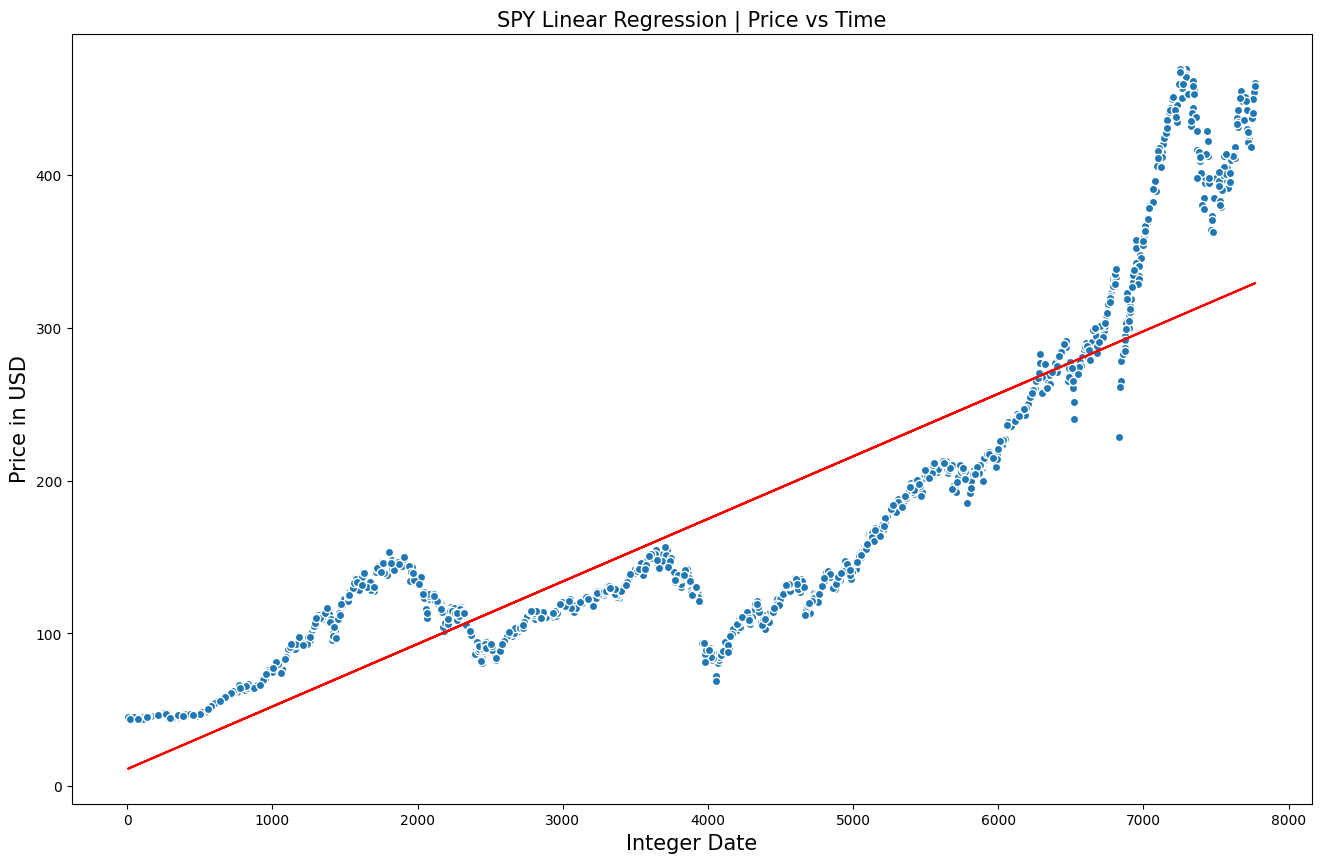

In [56]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('SPY Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_spy, spy_model.predict(X_test_spy), color='r', label='Predicted Price')
plt.scatter(X_test_spy, y_test_spy, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

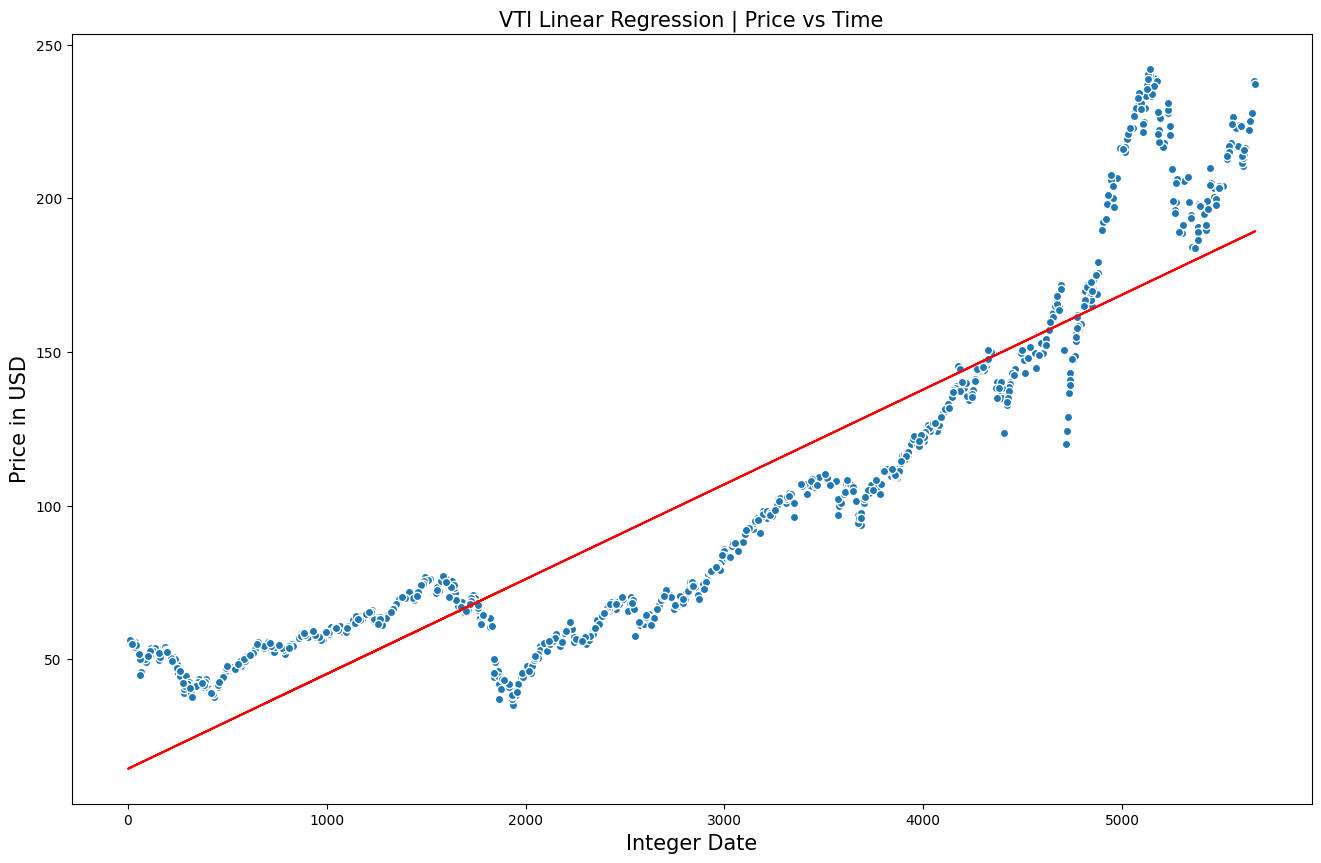

In [57]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('VTI Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_vti, vti_model.predict(X_test_vti), color='r', label='Predicted Price')
plt.scatter(X_test_vti, y_test_vti, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

# Step 8 - Graphing 'predicted price vs actual price' scatterplots

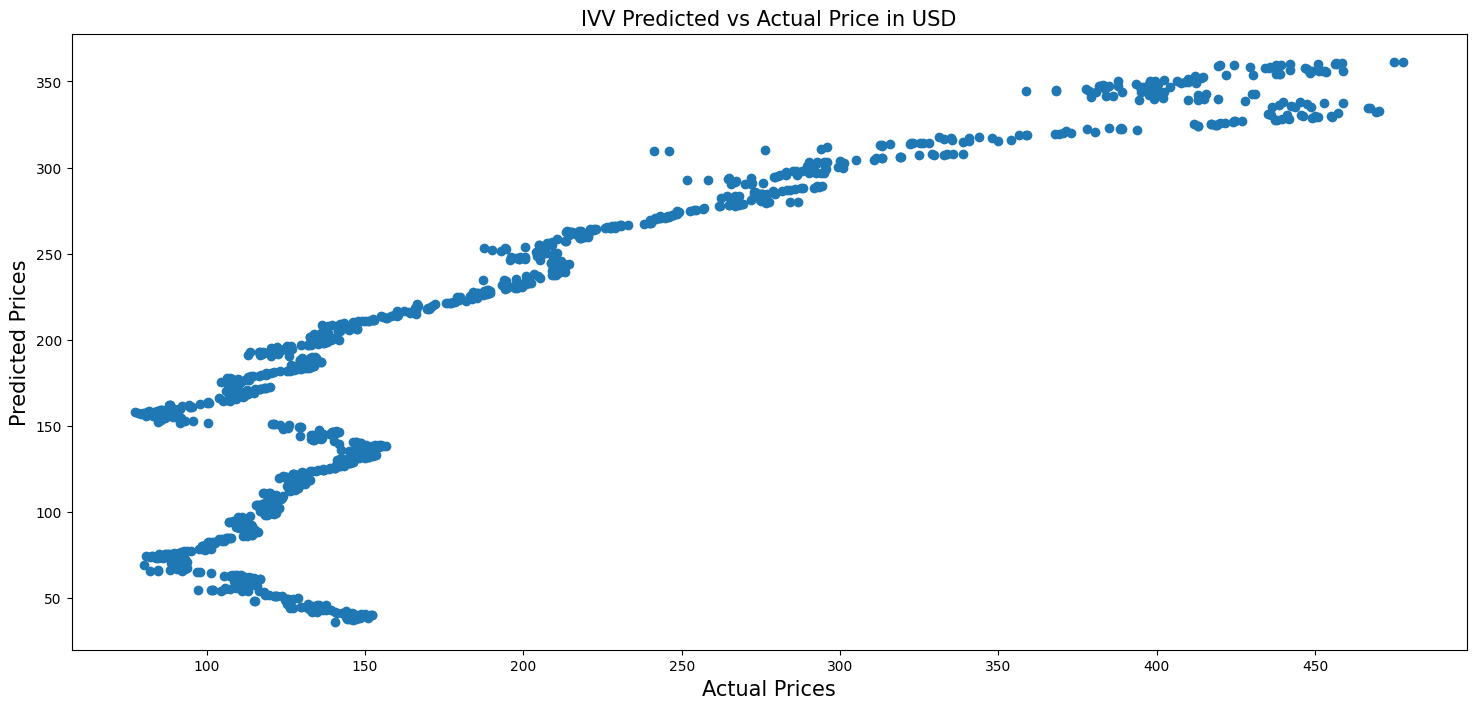

In [58]:
# Plot predicted vs actual prices
plt.scatter(y_test_ivv, y_pred_ivv)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('IVV Predicted vs Actual Price in USD', fontsize=15)
plt.show()

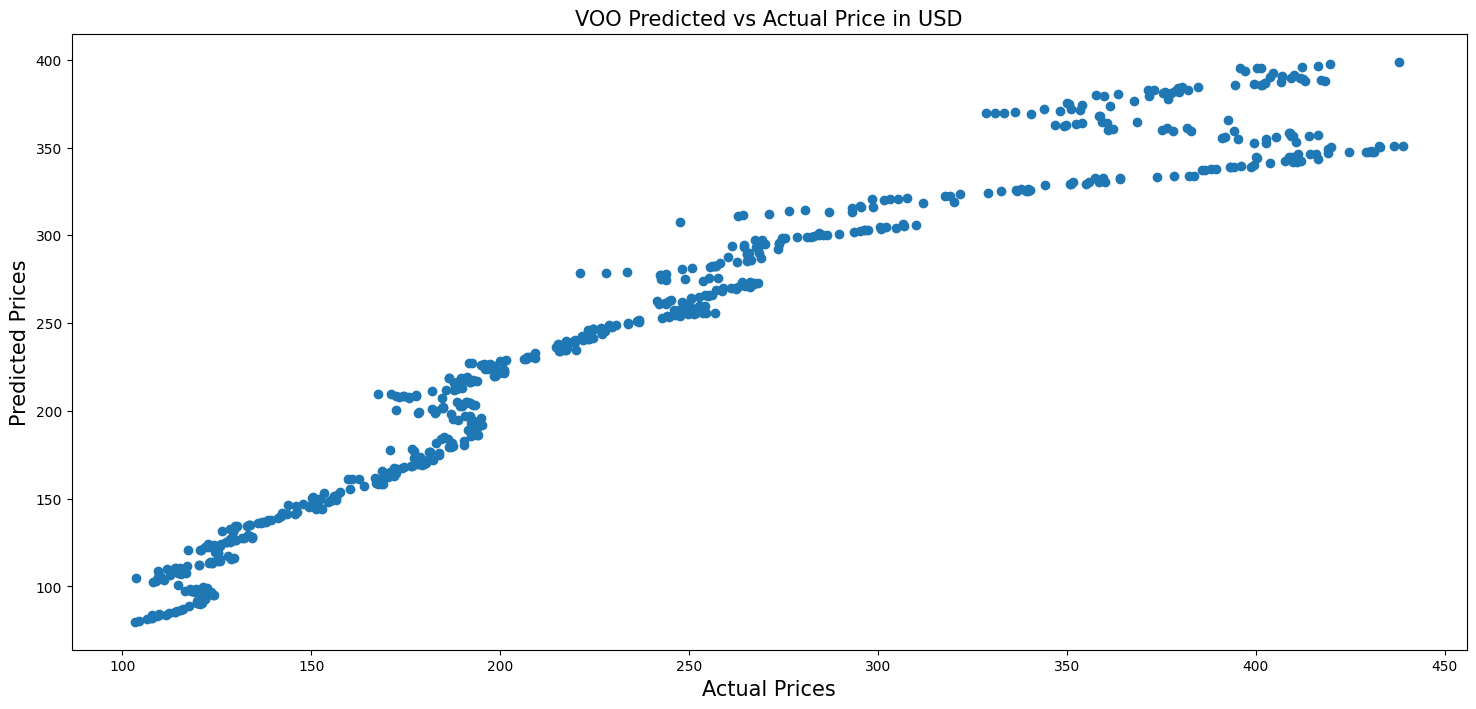

In [59]:
# Plot predicted vs actual prices
plt.scatter(y_test_voo, y_pred_voo)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('VOO Predicted vs Actual Price in USD', fontsize=15)
plt.show()

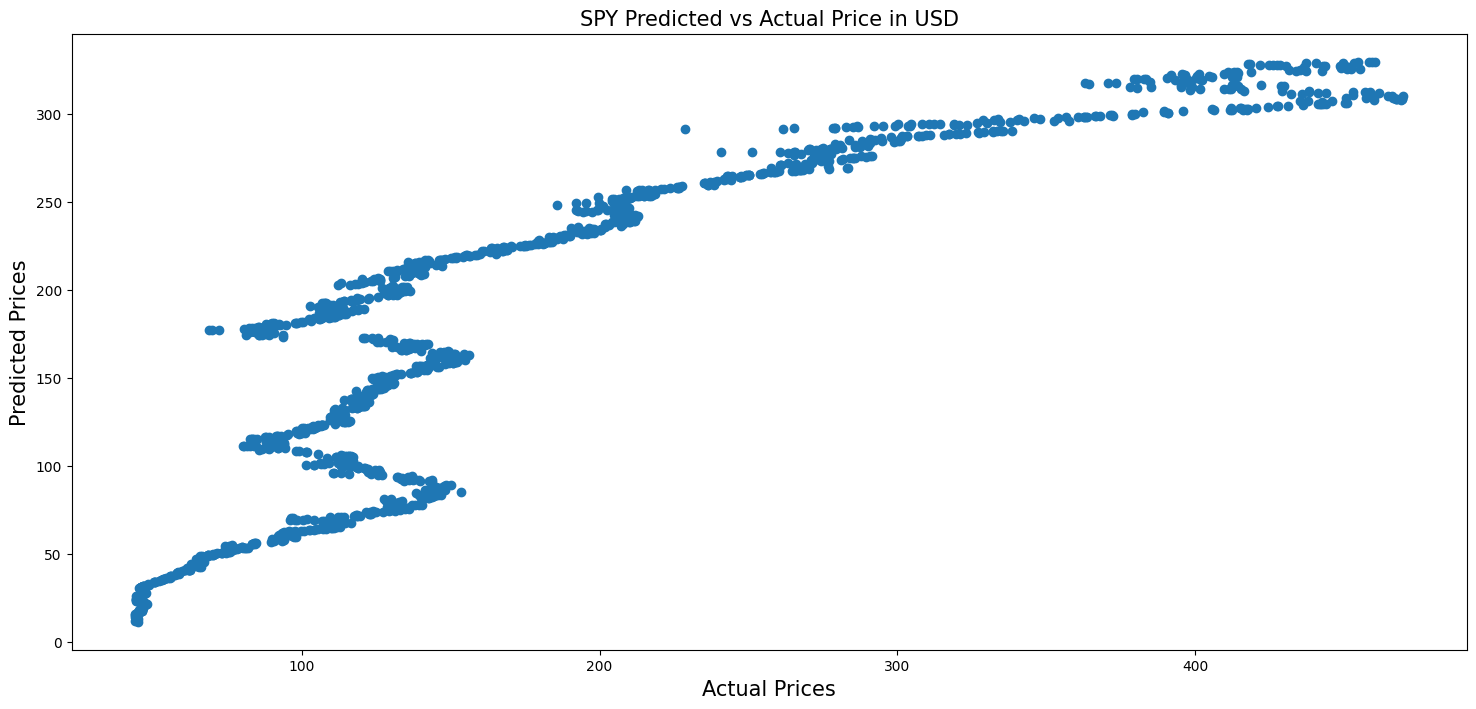

In [60]:
# Plot predicted vs actual prices
plt.scatter(y_test_spy, y_pred_spy)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('SPY Predicted vs Actual Price in USD', fontsize=15)
plt.show()

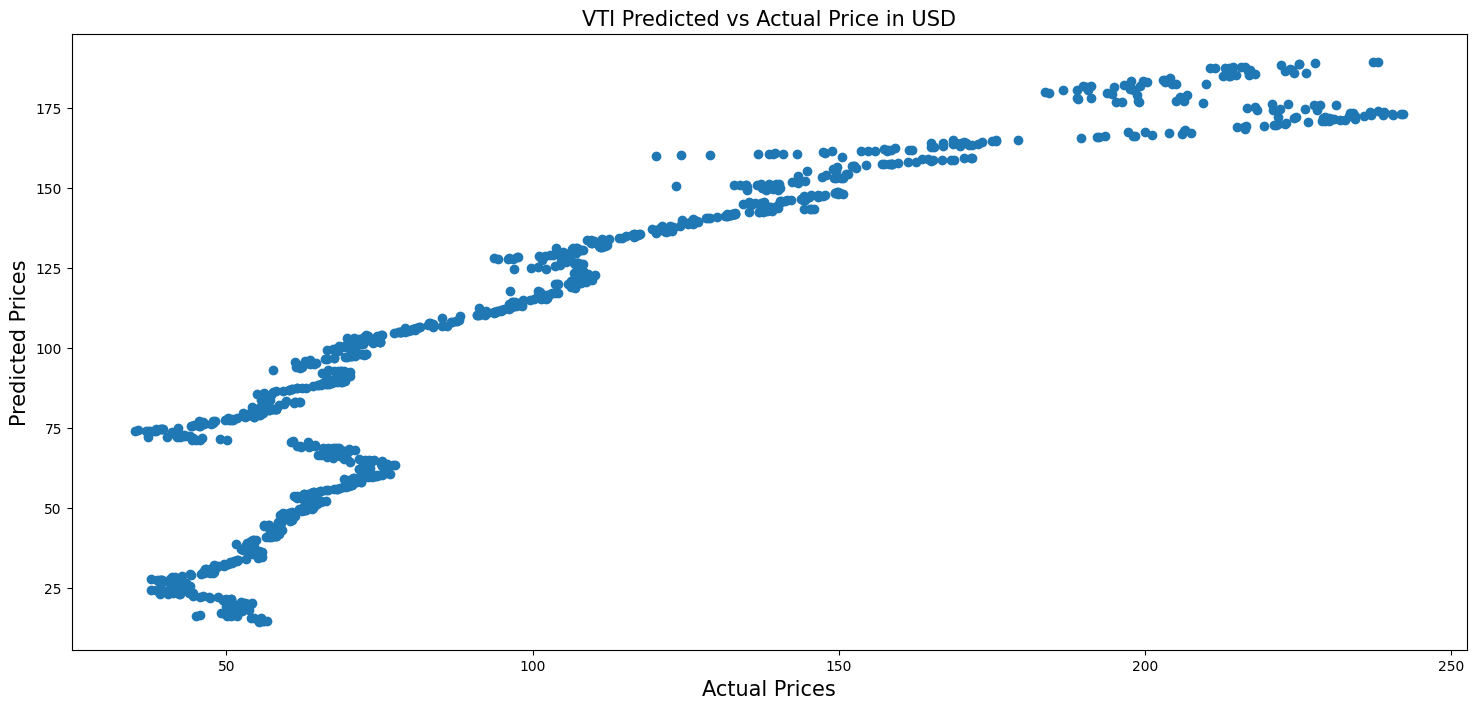

In [61]:
# Plot predicted vs actual prices
plt.scatter(y_test_vti, y_pred_vti)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('VTI Predicted vs Actual Price in USD', fontsize=15)
plt.show()

The data points are mostly close to a diagonal, which indicates, that the predicted values are close to the actual value and the model's performance is largerly quite good. Yet there are some areas where the models seem to be quite random and show no relationship between the predicted and actual value; for instance 'zigzag' sections where the margin of error or difference is too large (for example, data points where the actual price was 200 USD but it predicted a price of 150 USD where the difference is relatively large.

# Step 9 - Plot residual histogram

The Histogram of the Residual can be used to check whether the variance is normally distributed. A symmetric bell-shaped histogram which is evenly distributed around zero indicates that the normality assumption is likely to be true. However, stock or ETF data in most cases will never be normally distributed.

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_5715/3523727307.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_ivv - y_pred_ivv), label='Residual Histogram & Distribution')


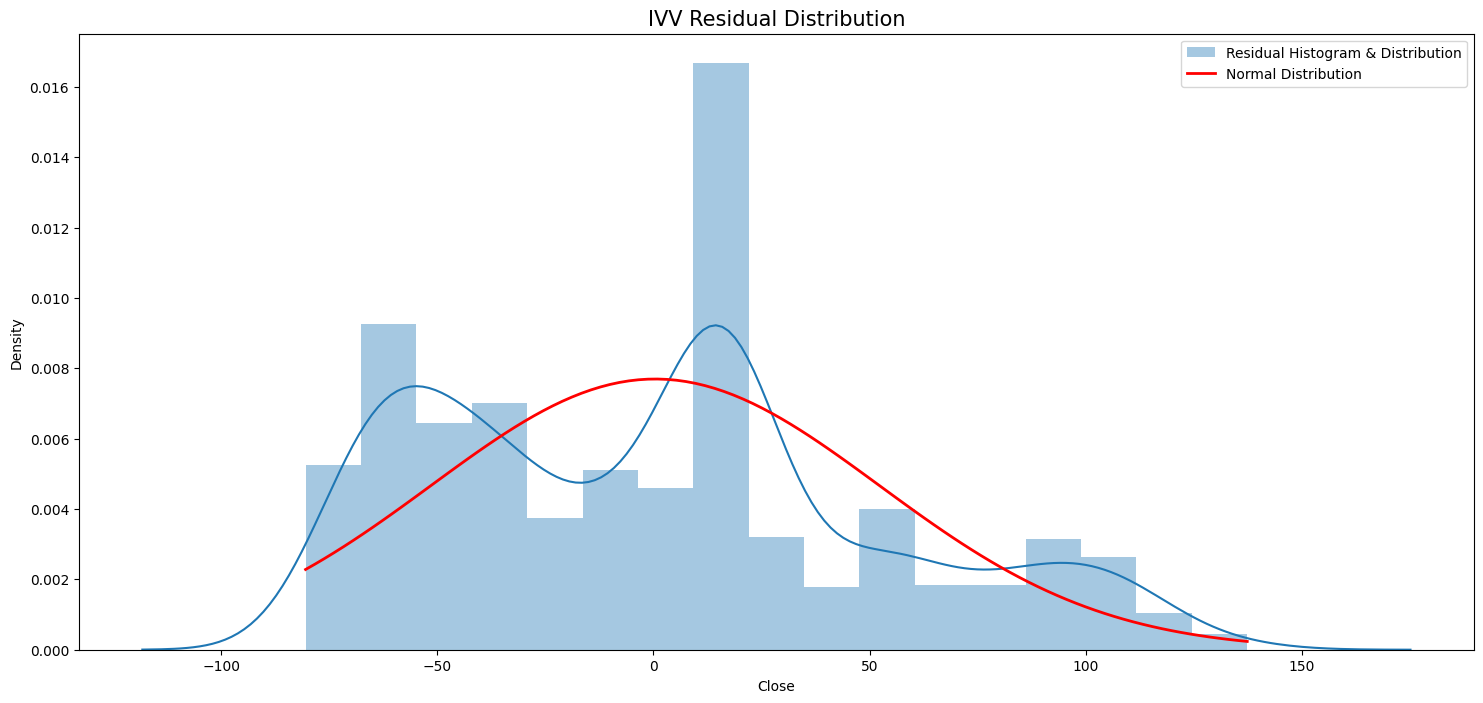

In [62]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_ivv - y_pred_ivv)
ax = sns.distplot((y_test_ivv - y_pred_ivv), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_ivv - y_pred_ivv), max(y_test_ivv - y_pred_ivv), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('IVV Residual Distribution', fontsize=15)
plt.legend()
plt.show()

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_5715/3025117278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_voo - y_pred_voo), label='Residual Histogram & Distribution')


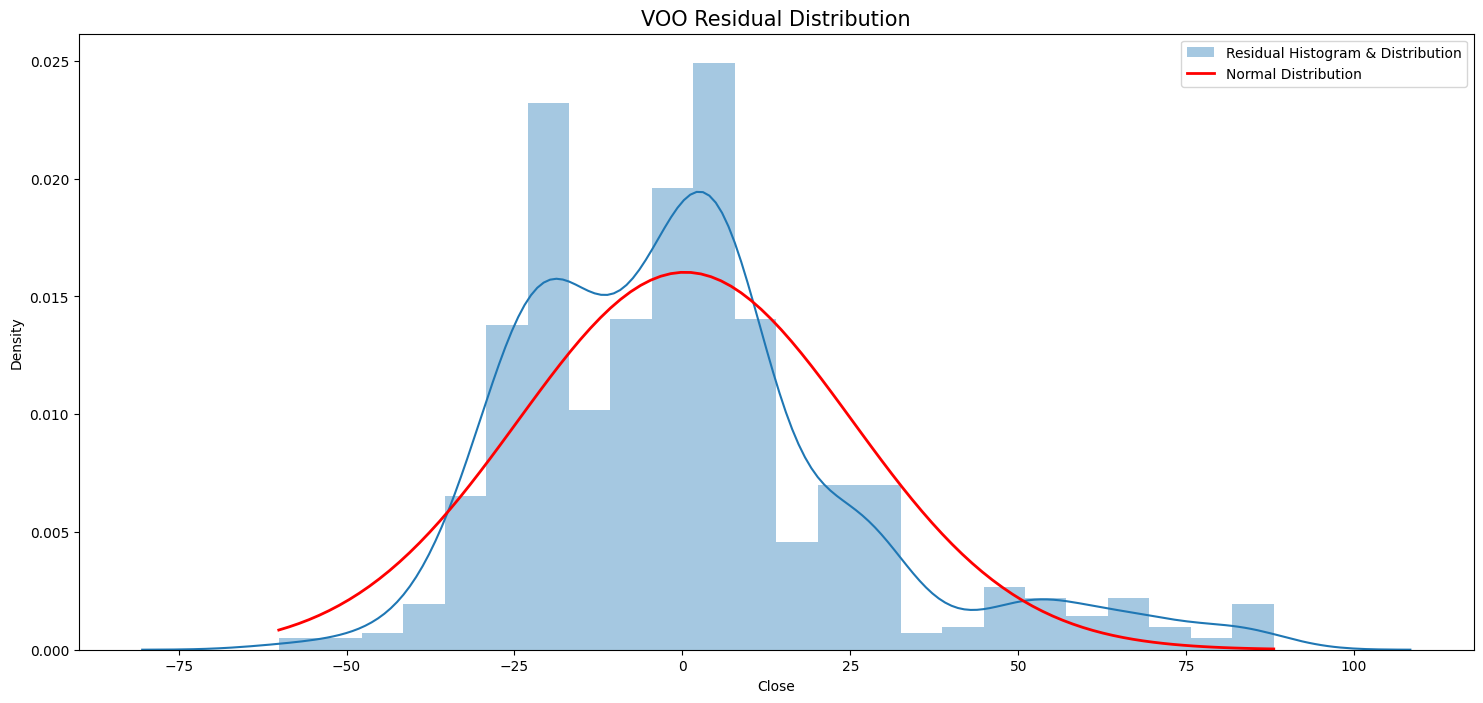

In [64]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_voo - y_pred_voo)
ax = sns.distplot((y_test_voo - y_pred_voo), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_voo - y_pred_voo), max(y_test_voo - y_pred_voo), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('VOO Residual Distribution', fontsize=15)
plt.legend()
plt.show()

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_5715/3852596557.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_spy - y_pred_spy), label='Residual Histogram & Distribution')


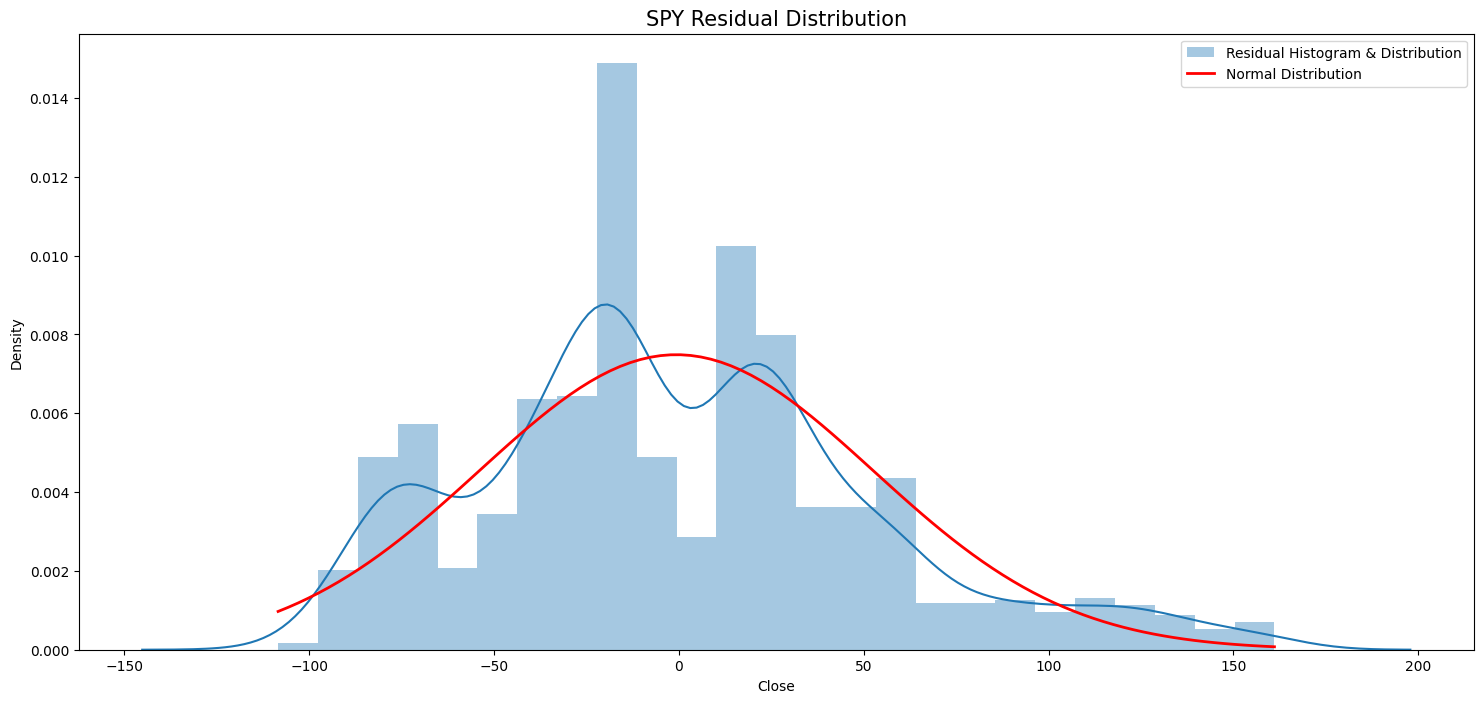

In [65]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_spy - y_pred_spy)
ax = sns.distplot((y_test_spy - y_pred_spy), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_spy - y_pred_spy), max(y_test_spy - y_pred_spy), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('SPY Residual Distribution', fontsize=15)
plt.legend()
plt.show()

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_5715/3083904586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_vti - y_pred_vti), label='Residual Histogram & Distribution')


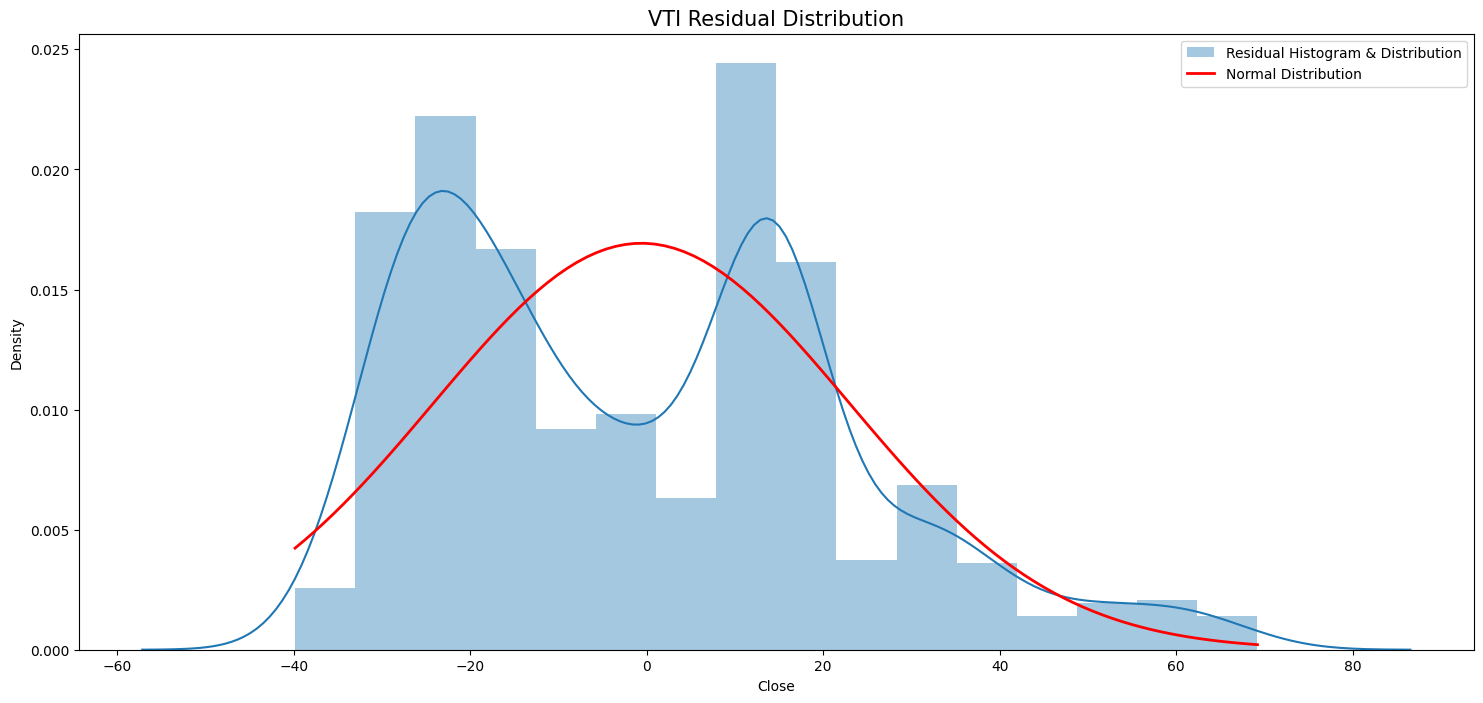

In [66]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_vti - y_pred_vti)
ax = sns.distplot((y_test_vti - y_pred_vti), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_vti - y_pred_vti), max(y_test_vti - y_pred_vti), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('VTI Residual Distribution', fontsize=15)
plt.legend()
plt.show()

In [67]:
# Add new column for predictions to df
ivv_df['Prediction'] = ivv_model.predict(np.array(ivv_df.index).reshape(-1, 1))
voo_df['Prediction'] = voo_model.predict(np.array(voo_df.index).reshape(-1, 1))
spy_df['Prediction'] = spy_model.predict(np.array(spy_df.index).reshape(-1, 1))
vti_df['Prediction'] = vti_model.predict(np.array(vti_df.index).reshape(-1, 1))

In [69]:
ivv_df.tail()
#voo_df.tail()
#spy_df.tail()
#vti_df.tail()

Date       Close  Prediction
5936 2023-12-22  475.820007  361.370265
5937 2023-12-26  477.869995  361.425029
5938 2023-12-27  478.779999  361.479793
5939 2023-12-28  479.000000  361.534556
5940 2023-12-29  477.630005  361.589320

# Step 10 - Perform error evaluation metrics

An error metric is a way to quantify the performance of a model and provides a way for the forecaster to quantitatively compare different models. the following types of error are: <br />

1. __Mean Absolute Error (MAE)__: Is the absolute value of difference between observed data points vs. predicted points divided by the sample size. <br />
2. __Mean Squared Error (MSE)__: Is the average squared difference between observed data points vs. predicted points. <br />
3. __Root Mean Squared Error (RMSE)__: is the square root of the mean of the squared errors (MSE).

### Error evaluation for IVV

In [70]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ivv, y_pred_ivv))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ivv, y_pred_ivv))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ivv, y_pred_ivv)))

Mean Absolute Error: 42.777162713584126
Mean Squared Error: 2688.6798478067303
Root Mean Squared Error: 51.85248159738095


### Error evaluation for VOO

In [71]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_voo, y_pred_voo))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_voo, y_pred_voo))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_voo, y_pred_voo)))

Mean Absolute Error: 18.432117065698918
Mean Squared Error: 619.8495493952782
Root Mean Squared Error: 24.896777891833278


### Error evaluation for SPY

In [72]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_spy, y_pred_spy))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_spy, y_pred_spy))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_spy, y_pred_spy)))

Mean Absolute Error: 42.56580990515456
Mean Squared Error: 2840.3729564853415
Root Mean Squared Error: 53.295149464893534


### Error evaluation for VTI

In [73]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_vti, y_pred_vti))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_vti, y_pred_vti))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_vti, y_pred_vti)))

Mean Absolute Error: 20.132241577757494
Mean Squared Error: 555.8848149900489
Root Mean Squared Error: 23.57720965233267


# Step 11 - Perform accuracy evaluation metrics

To see how accurate our model is, we can calculate the __Coefficient of determination__, which describes the ratio between the total error and the error. It's value is between 0 and 1, with 1 meaning 100% of the error is accounted for by the model. <br />

1. The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.<br />
2. The explained variance score explains the dispersion of errors of a given dataset. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

### Accuracy for IVV

In [74]:
print('R2: ', metrics.r2_score(y_test_ivv, y_pred_ivv))

R2:  0.7578840735856307


In [75]:
explained_variance_score(y_test_ivv, y_pred_ivv)

0.7578982600382657

### Accuracy for VOO

In [76]:
print('R2: ', metrics.r2_score(y_test_voo, y_pred_voo))

R2:  0.9302945028165533


In [77]:
explained_variance_score(y_test_voo, y_pred_voo)

0.9303135145079326

### Accuracy for SPY

In [78]:
print('R2: ', metrics.r2_score(y_test_spy, y_pred_spy))

R2:  0.7563511297068851


In [79]:
explained_variance_score(y_test_spy, y_pred_spy)

0.7563932951751873

### Accuracy for VTI

In [80]:
print('R2: ', metrics.r2_score(y_test_vti, y_pred_vti))

R2:  0.8101029486698397


In [81]:
explained_variance_score(y_test_vti, y_pred_vti)

0.8102262722343581

# Step 12 - Results

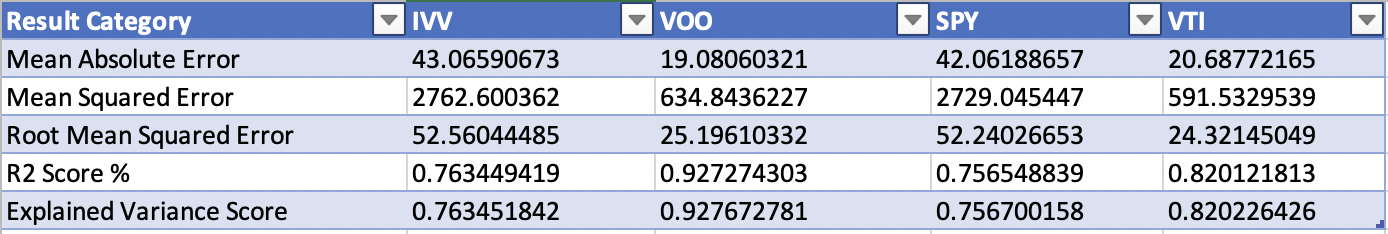

# Step 13 - Conclusion

The linear regression / machine learning model was trained efficiently as it accurately predicted the odds of share price (from any of the top 4 large blend funds - IVV, VOO, SPY, VTI) increment in the future or 'tomorrow'. Realistically nobody can predict future prices for certain but we are aware (as seen in the financial analysis' Moving Averages graphs - Jupyter Notebooks 1 through 3) that Index Funds tend to increase in value with respect to time despite economic downturns or outlying events (such COVID Pandemic). R2 score & variance score were higher than 70% which is good & the models predict prices to continue increasing throughout the years, however, error is expected to be high as the market has plenty of ups & downs - therefore multiple data points' predictions are inaccurate. 